# Detection of Auto Insurance Fraud Claim

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("insurance_claims.csv")
data.head()



,Customer_duration,Years_old,Policy_unique_id,Policy_activation_date,Policy_region_state,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Zip_code,...,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Basic checks

In [2]:
data.tail()

,Customer_duration,Years_old,Policy_unique_id,Policy_activation_date,Policy_region_state,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Zip_code,...,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [3]:
data.shape   

(1000, 39)

In [4]:
## Getting all columns form the dataset
data.columns

Index(['Customer_duration', 'Years_old', 'Policy_unique_id',
       'Policy_activation_date', 'Policy_region_state',
       'Policy_combined_single_limit', 'Policy_deductable_amount',
       'Policy_premium_per_year', 'Umbrella_insurance_limit', 'Zip_code',
       'Insured_Gender', 'Education_Level', 'Insured_profession',
       'Insured-Hobbies', 'Insured_kinship', 'Capital_Gains', 'Capital_Loss',
       'Date_of_incident', 'Type_of_incident', 'Collision_mode',
       'Severity_level', 'Contacted_Authorities', 'Incident_location_state',
       'Incident_location_city', 'Incident-Location', 'Incident-hour',
       'Vehicle_participation', 'Damage_to_property', 'Physical_injury',
       'Witnesses_present', 'Presence_of_police_report', 'Total_Claim',
       'Bodily_Injury_Claim', 'Property_Damage_Claim', 'Vehicle_Damage_Claim',
       'Auto_Producer', 'Vehicle_Model', 'Vehicle_year', 'Fraud_Reported'],
      dtype='object')

In [5]:
data.head(pd.set_option('display.max_columns',None))#to display all columns from dataset

,Customer_duration,Years_old,Policy_unique_id,Policy_activation_date,Policy_region_state,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Zip_code,Insured_Gender,Education_Level,Insured_profession,Insured-Hobbies,Insured_kinship,Capital_Gains,Capital_Loss,Date_of_incident,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Incident_location_state,Incident_location_city,Incident-Location,Incident-hour,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [6]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 
#for numericals

,Customer_duration,Years_old,Policy_unique_id,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Zip_code,Capital_Gains,Capital_Loss,Incident-hour,Vehicle_participation,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
data.describe(include= 'object')
#for categorical values


,Policy_activation_date,Policy_region_state,Policy_combined_single_limit,Insured_Gender,Education_Level,Insured_profession,Insured-Hobbies,Insured_kinship,Date_of_incident,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Incident_location_state,Incident_location_city,Incident-Location,Damage_to_property,Presence_of_police_report,Auto_Producer,Vehicle_Model,Fraud_Reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_duration             1000 non-null   int64  
 1   Years_old                     1000 non-null   int64  
 2   Policy_unique_id              1000 non-null   int64  
 3   Policy_activation_date        1000 non-null   object 
 4   Policy_region_state           1000 non-null   object 
 5   Policy_combined_single_limit  1000 non-null   object 
 6   Policy_deductable_amount      1000 non-null   int64  
 7   Policy_premium_per_year       1000 non-null   float64
 8   Umbrella_insurance_limit      1000 non-null   int64  
 9   Zip_code                      1000 non-null   int64  
 10  Insured_Gender                1000 non-null   object 
 11  Education_Level               1000 non-null   object 
 12  Insured_profession            1000 non-null   object 
 13  Insu

In [9]:
data.nunique()

Customer_duration                391
Years_old                         46
Policy_unique_id                1000
Policy_activation_date           951
Policy_region_state                3
Policy_combined_single_limit       3
Policy_deductable_amount           3
Policy_premium_per_year          991
Umbrella_insurance_limit          11
Zip_code                         995
Insured_Gender                     2
Education_Level                    7
Insured_profession                14
Insured-Hobbies                   20
Insured_kinship                    6
Capital_Gains                    338
Capital_Loss                     354
Date_of_incident                  60
Type_of_incident                   4
Collision_mode                     4
Severity_level                     4
Contacted_Authorities              5
Incident_location_state            7
Incident_location_city             7
Incident-Location               1000
Incident-hour                     24
Vehicle_participation              4
D

# Checking the dataset

In [10]:
# target class count
data["Fraud_Reported"].value_counts()

N    753
Y    247
Name: Fraud_Reported, dtype: int64

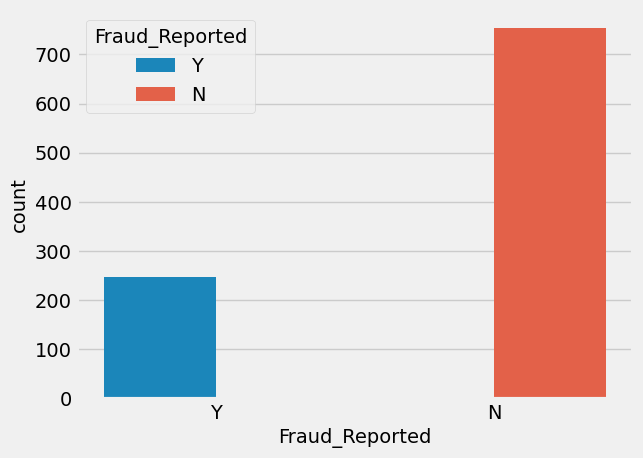

In [11]:
import seaborn as sns
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Fraud_Reported', data=data, hue='Fraud_Reported')



In [12]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",data["Fraud_Reported"].value_counts()/len(data)*100)

percentage of NO and YES
 N    75.3
Y    24.7
Name: Fraud_Reported, dtype: float64


This percentage indicates that the data is imbalanced

# Exploratory Data Analysis

In [13]:
data[data.duplicated()]

,Customer_duration,Years_old,Policy_unique_id,Policy_activation_date,Policy_region_state,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Zip_code,Insured_Gender,Education_Level,Insured_profession,Insured-Hobbies,Insured_kinship,Capital_Gains,Capital_Loss,Date_of_incident,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Incident_location_state,Incident_location_city,Incident-Location,Incident-hour,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported


there are no duplicated values in the dataset

Univariate analysis of categorical 

Index(['Policy_activation_date', 'Policy_region_state',
       'Policy_combined_single_limit', 'Insured_Gender', 'Education_Level',
       'Insured_profession', 'Insured-Hobbies', 'Insured_kinship',
       'Date_of_incident', 'Type_of_incident', 'Collision_mode',
       'Severity_level', 'Contacted_Authorities', 'Incident_location_state',
       'Incident_location_city', 'Incident-Location', 'Damage_to_property',
       'Presence_of_police_report', 'Auto_Producer', 'Vehicle_Model',
       'Fraud_Reported'],
      dtype='object')


C:\Users\akash\AppData\Local\Temp\ipykernel_11340\1283715801.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,4))


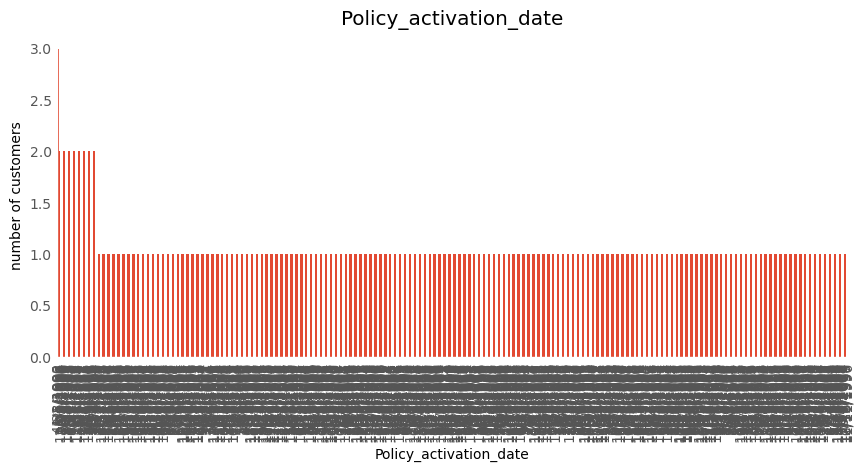

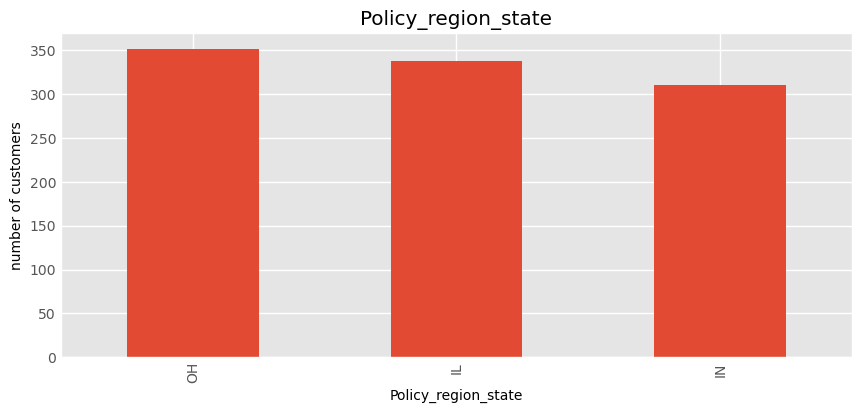

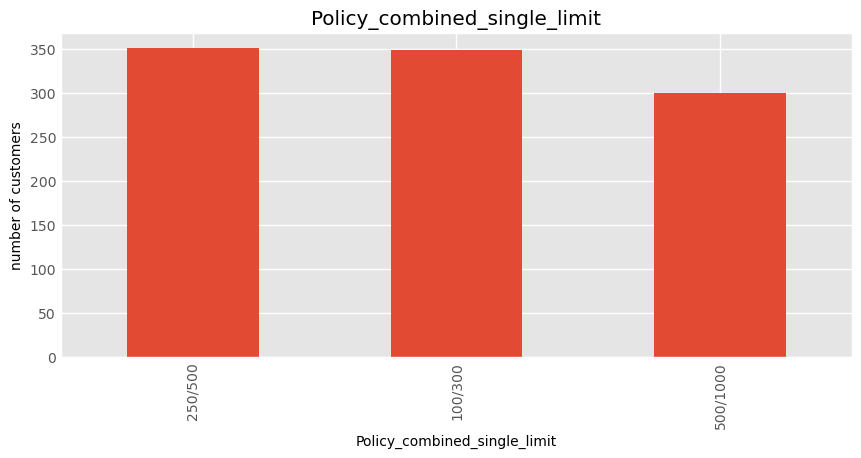

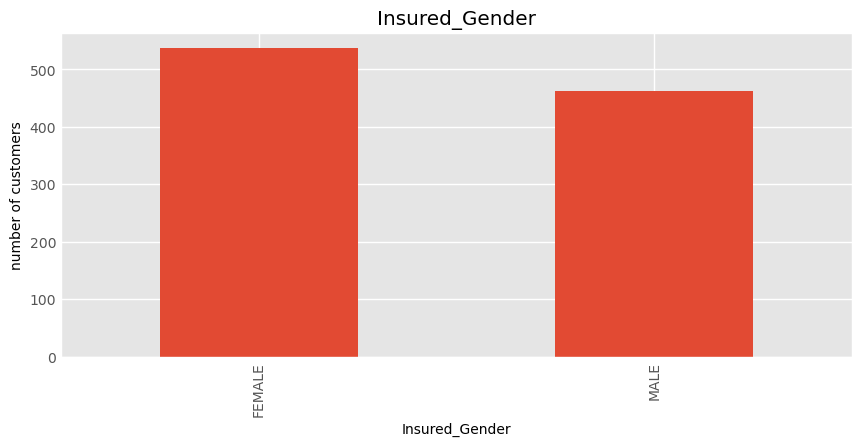

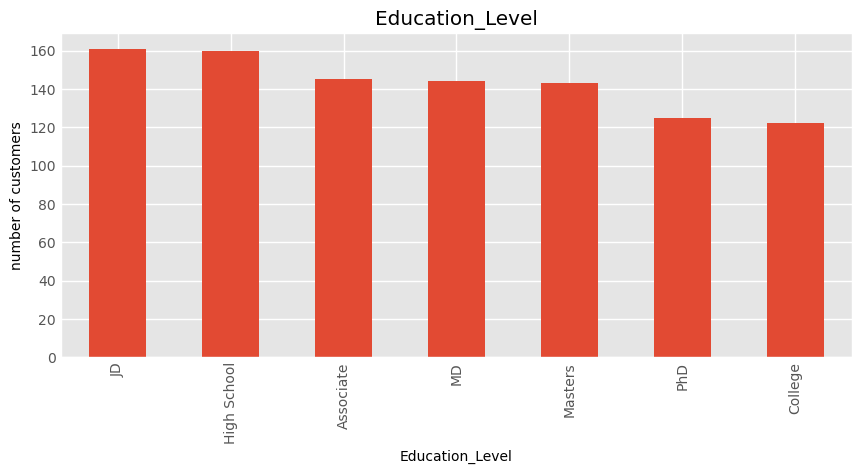

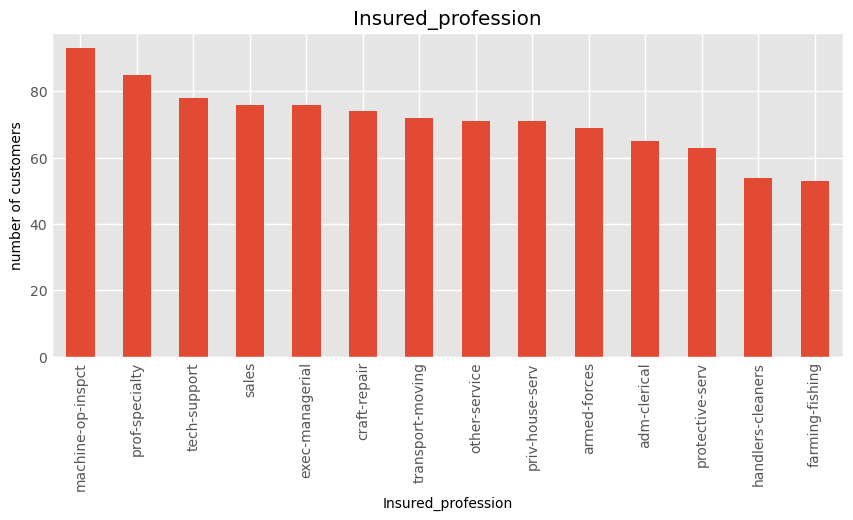

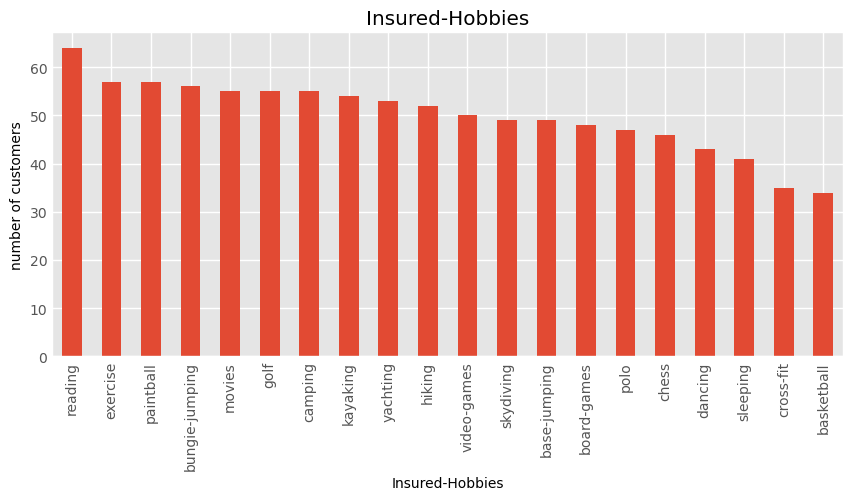

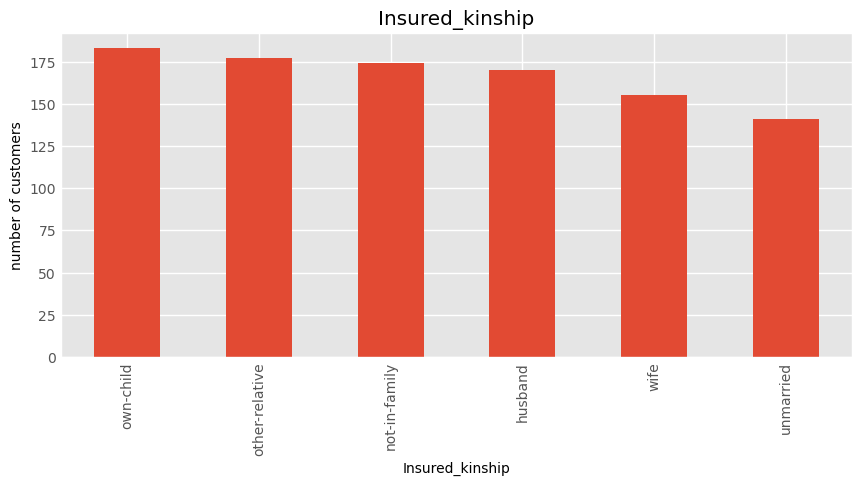

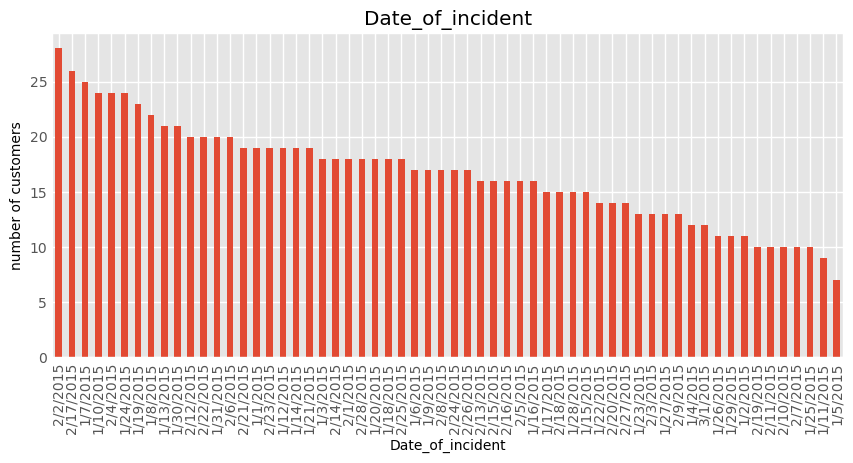

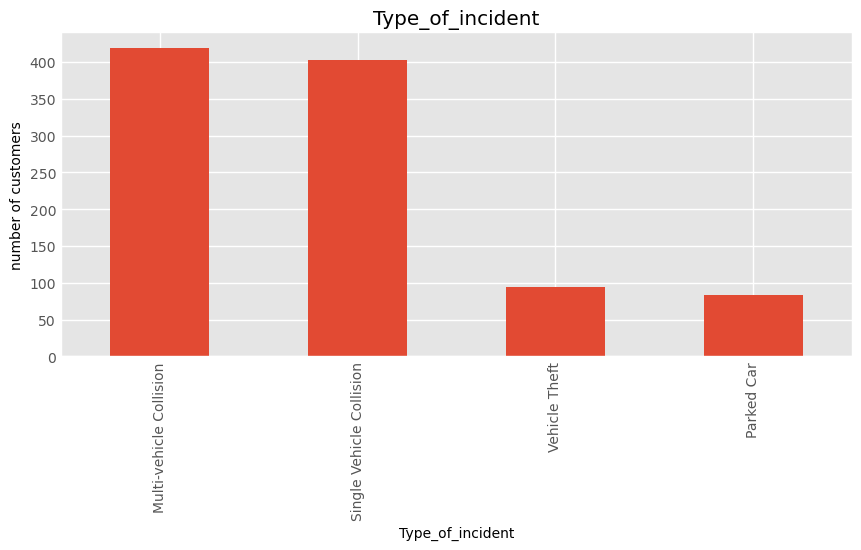

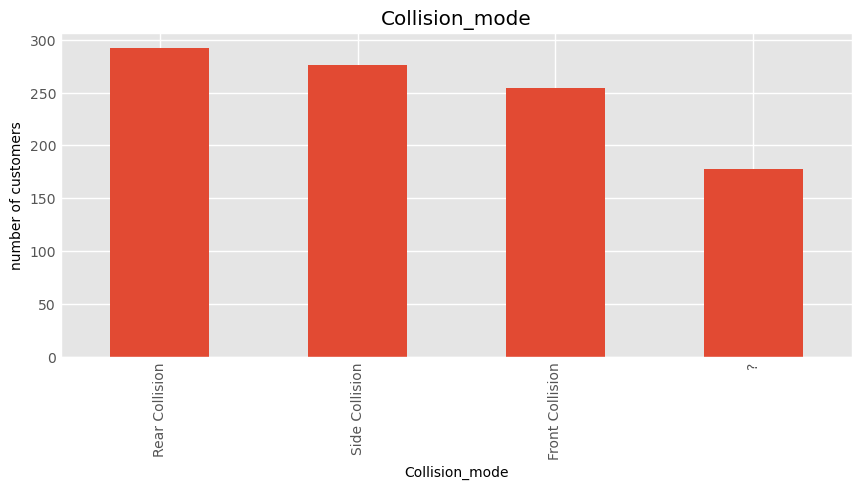

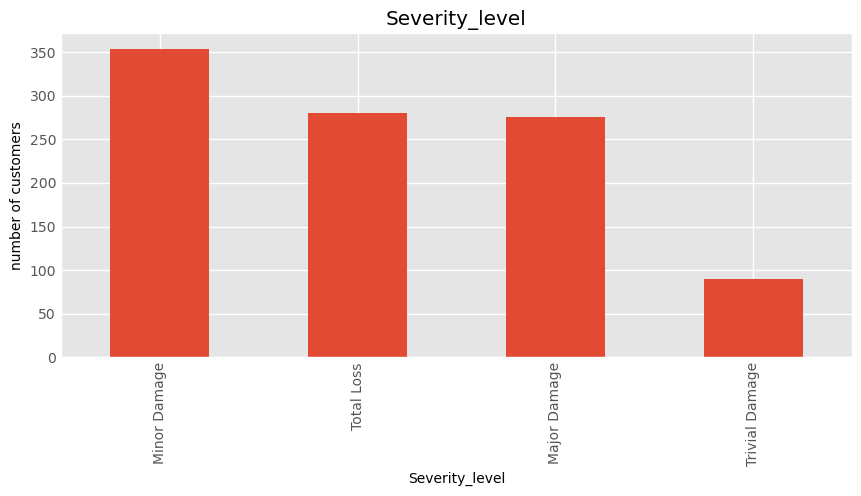

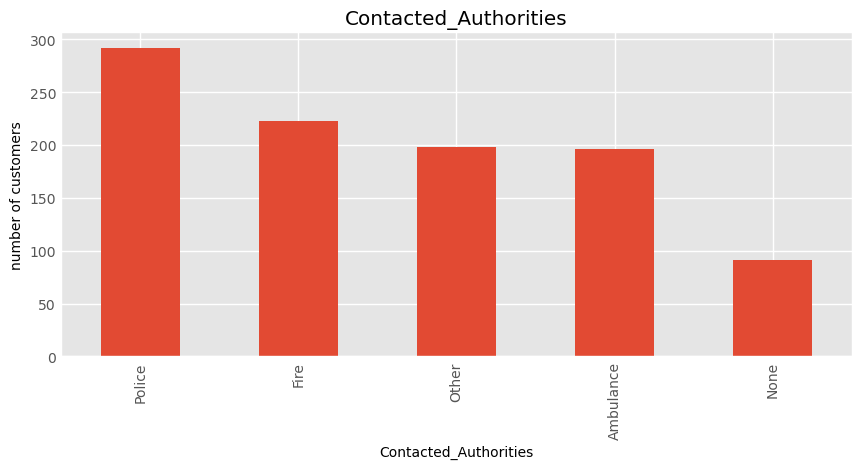

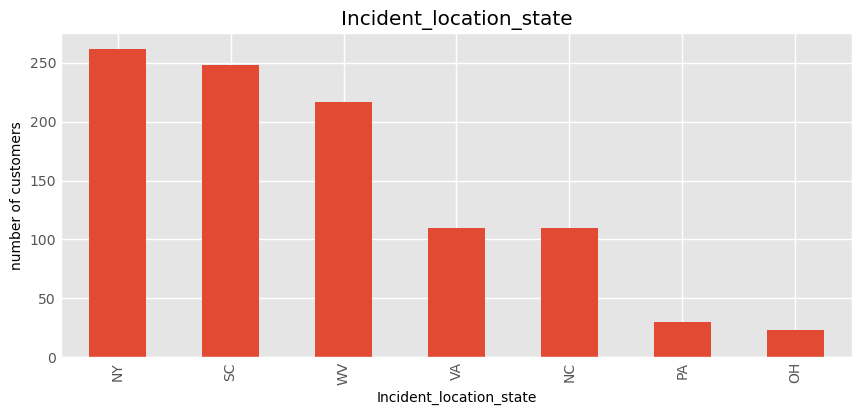

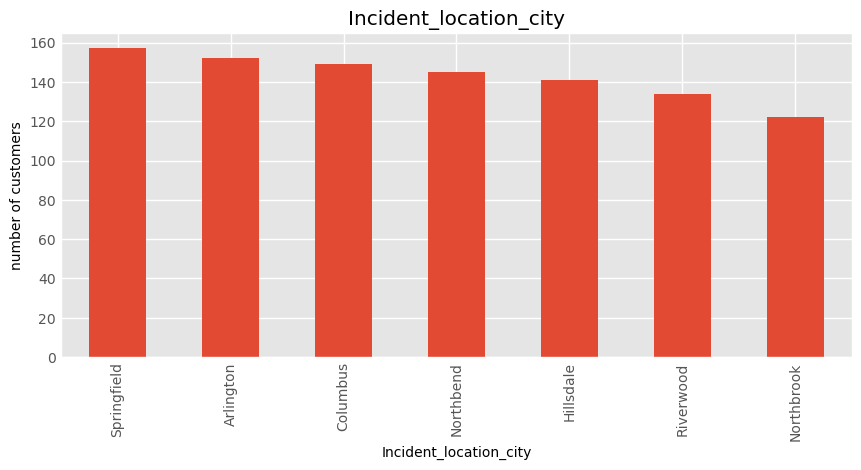

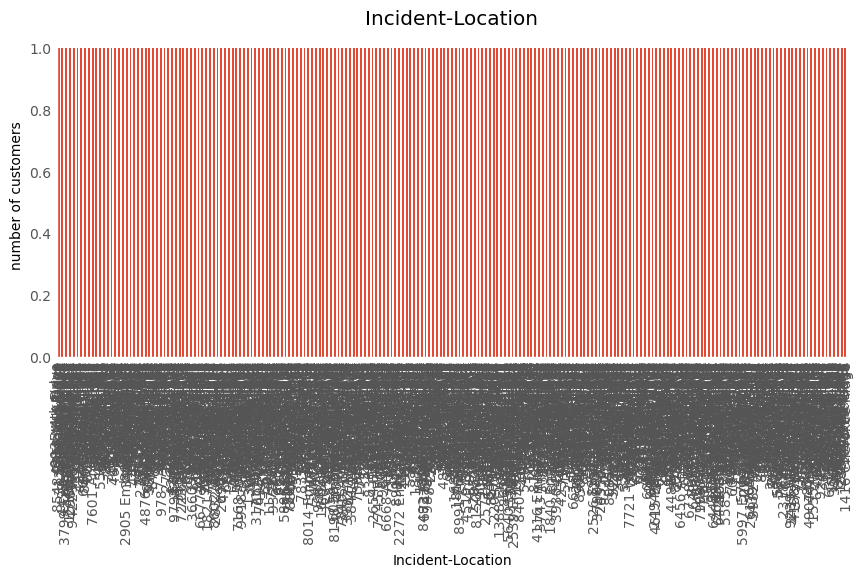

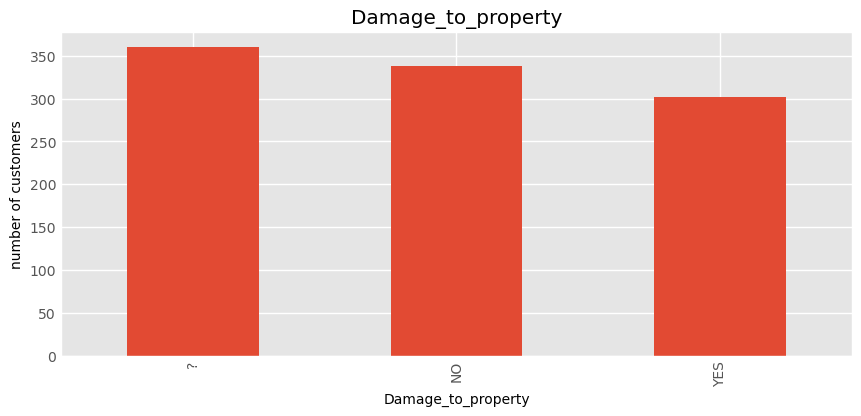

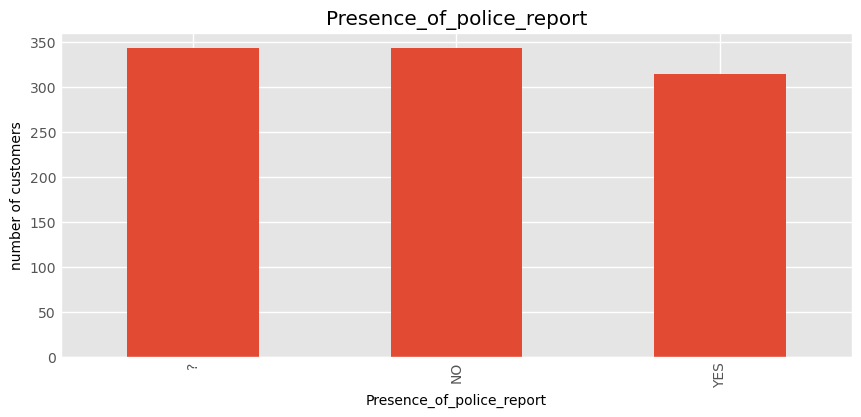

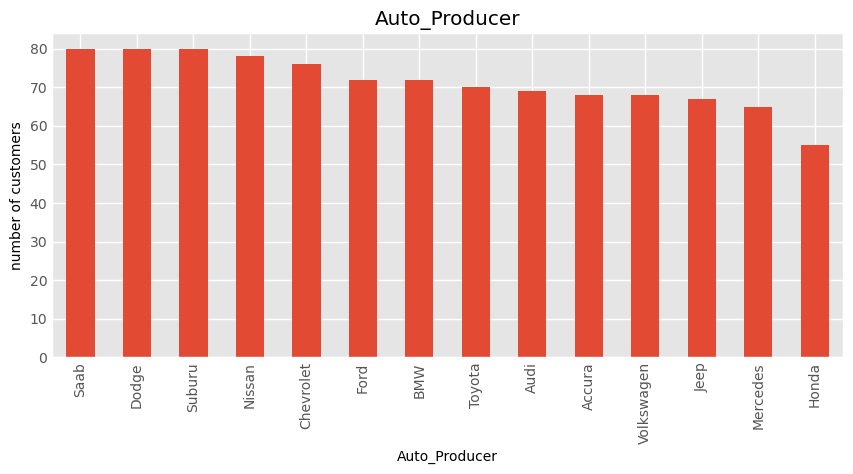

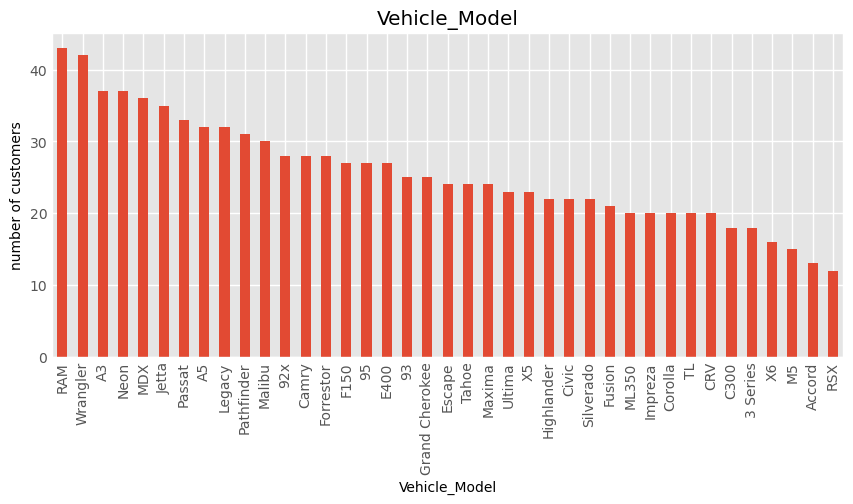

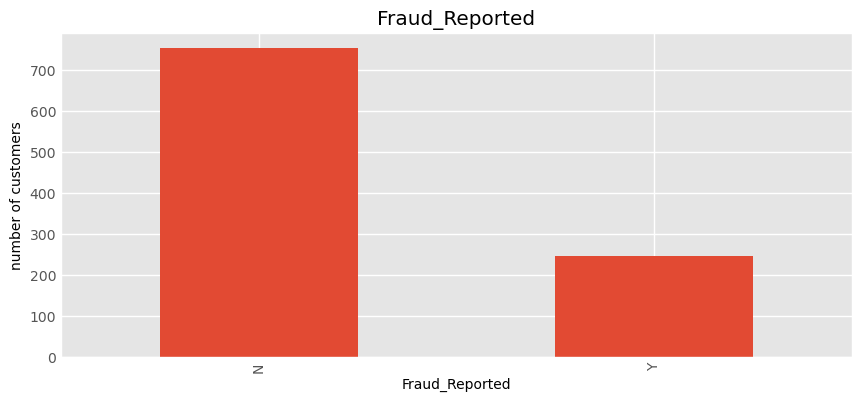

In [14]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

# Missing values

In [15]:
data.isnull().sum(axis=0).sort_values(ascending=False)

Customer_duration               0
Witnesses_present               0
Incident_location_state         0
Incident_location_city          0
Incident-Location               0
Incident-hour                   0
Vehicle_participation           0
Damage_to_property              0
Physical_injury                 0
Presence_of_police_report       0
Severity_level                  0
Total_Claim                     0
Bodily_Injury_Claim             0
Property_Damage_Claim           0
Vehicle_Damage_Claim            0
Auto_Producer                   0
Vehicle_Model                   0
Vehicle_year                    0
Contacted_Authorities           0
Collision_mode                  0
Years_old                       0
Zip_code                        0
Policy_unique_id                0
Policy_activation_date          0
Policy_region_state             0
Policy_combined_single_limit    0
Policy_deductable_amount        0
Policy_premium_per_year         0
Umbrella_insurance_limit        0
Insured_Gender

In [16]:
data.drop(['Policy_unique_id','Policy_activation_date','Date_of_incident','Incident-Location','Zip_code','Years_old','Policy_region_state','Insured_Gender','Incident-hour','Incident_location_state','Incident_location_city','Education_Level','Capital_Gains','Capital_Loss'],axis=1,inplace=True)

In [17]:
# identify variables with '?' values
unknowns = {}
for i in np.array(data.columns):
    if (data[i]).dtype == object:
        j = np.sum(data[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                                0
Policy_combined_single_limit    0
Insured_profession              0
Insured-Hobbies                 0
Insured_kinship                 0
Type_of_incident                0
Collision_mode                178
Severity_level                  0
Contacted_Authorities           0
Damage_to_property            360
Presence_of_police_report     343
Auto_Producer                   0
Vehicle_Model                   0
Fraud_Reported                  0


In [18]:
data.Collision_mode.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: Collision_mode, dtype: int64

In [19]:
#label encoding for 'collision type' col
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list=["Collision_mode"]
for i in list:
    le=preprocessing.LabelEncoder()
    le.fit(data[i])
    
    data[i]=le.transform(data[i])
data


,Customer_duration,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
0,328,250/500,1000,1406.91,0,craft-repair,sleeping,husband,Single Vehicle Collision,3,Major Damage,Police,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,250/500,2000,1197.22,5000000,machine-op-inspct,reading,other-relative,Vehicle Theft,0,Minor Damage,Police,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,100/300,2000,1413.14,5000000,sales,board-games,own-child,Multi-vehicle Collision,2,Minor Damage,Police,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,250/500,2000,1415.74,6000000,armed-forces,board-games,unmarried,Single Vehicle Collision,1,Major Damage,Police,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,500/1000,1000,1583.91,6000000,sales,board-games,unmarried,Vehicle Theft,0,Minor Damage,None,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,craft-repair,paintball,unmarried,Single Vehicle Collision,1,Minor Damage,Fire,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,100/300,1000,1436.79,0,prof-specialty,sleeping,wife,Single Vehicle Collision,2,Major Damage,Fire,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,250/500,500,1383.49,3000000,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,3,Minor Damage,Police,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,500/1000,2000,1356.92,5000000,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,2,Major Damage,Other,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [20]:
data.Collision_mode.value_counts()

2    292
3    276
1    254
0    178
Name: Collision_mode, dtype: int64

In [21]:
!pip install  KModes

In [22]:
from kmodes.kmodes import KModes
import pandas as pd
import numpy as np



# Replace '?' values with NaN values
data.replace('?', np.nan, inplace=True)

In [23]:
# Split the data into columns with missing values and columns without missing values
cols_with_missing = data.columns[data.isna().any()].tolist()
cols_without_missing = np.array(set(data.columns) - set(cols_with_missing))



In [24]:
cols_with_missing = data.columns[data.isna().any()].tolist()
cols_with_missing

['Damage_to_property', 'Presence_of_police_report']

In [25]:
cols_without_missing = np.array(set(data.columns) - set(cols_with_missing))
cols_without_missing 


array({'Type_of_incident', 'Auto_Producer', 'Policy_premium_per_year', 'Policy_deductable_amount', 'Insured_profession', 'Insured_kinship', 'Vehicle_Damage_Claim', 'Property_Damage_Claim', 'Collision_mode', 'Total_Claim', 'Bodily_Injury_Claim', 'Vehicle_Model', 'Insured-Hobbies', 'Witnesses_present', 'Fraud_Reported', 'Severity_level', 'Customer_duration', 'Vehicle_year', 'Umbrella_insurance_limit', 'Contacted_Authorities', 'Physical_injury', 'Vehicle_participation', 'Policy_combined_single_limit'},
      dtype=object)

In [26]:
km = KModes(n_clusters=30, verbose=0)
clusters = km.fit_predict(data[cols_without_missing])


In [27]:

clusters

array([ 4,  0, 22,  4,  9, 29, 18, 20, 10,  0, 25,  3, 28,  9,  0,  5,  4,
       28, 28, 22, 18, 18, 22,  7, 19, 22, 25,  9, 12, 25,  1, 22,  6,  1,
       15,  7, 27,  9, 22,  8,  0,  4, 21, 14, 25,  1, 10,  3, 24, 16,  2,
       10,  9,  1,  9, 10,  2,  9,  2, 18, 22,  1, 12,  2,  5,  3, 10,  1,
        0,  9,  5, 16,  4, 19, 19, 26,  1,  3,  9,  8,  1, 24,  4, 24,  5,
        5, 26,  2,  9, 26,  1, 12,  9, 26, 19, 24,  8, 21,  9, 24,  0,  4,
        3,  9, 28, 28, 29, 22,  0,  8,  4,  0,  6, 26,  9,  1,  0,  3,  0,
        3,  2, 14, 14,  6, 27, 20, 16,  9,  2,  1,  3, 22, 26, 13,  4,  7,
        0,  5, 19,  6, 27, 24,  9,  8, 20, 25,  6, 10,  7,  8, 16, 19,  6,
        1, 20,  7,  3, 23, 20, 11,  9,  2,  1,  7,  6,  1,  8, 29,  0, 24,
        0, 23,  6,  3,  9,  0, 10, 23, 17, 10,  5, 11, 11, 10,  7,  2,  1,
        3, 21, 16,  9,  4, 27,  4,  1,  2, 24, 24, 14, 27, 24,  0, 24,  5,
        1,  0,  8,  5, 11,  0, 24, 24, 18, 28, 12, 19, 25, 24,  0, 19,  8,
       14, 10,  1,  5, 17

In [28]:

# For each column with missing values, replace missing values with the most frequent value in the same cluster
for col in cols_with_missing:
    # Create a copy of the original data to preserve the original values
    data_imputed = data.copy()
    
    # Replace missing values with the most frequent value in the same cluster
    for cluster in np.unique(clusters):
        # Get the most frequent value in the same cluster for this column
        mode = data_imputed.loc[clusters == cluster, col].mode()[0]
        
        # Replace missing values with the mode in the same cluster
        data_imputed.loc[(data_imputed[col].isna()) & (clusters == cluster), col] = mode

In [29]:
data[col] = data_imputed[col]


In [30]:
data

,Customer_duration,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
0,328,250/500,1000,1406.91,0,craft-repair,sleeping,husband,Single Vehicle Collision,3,Major Damage,Police,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,250/500,2000,1197.22,5000000,machine-op-inspct,reading,other-relative,Vehicle Theft,0,Minor Damage,Police,1,NaN,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,100/300,2000,1413.14,5000000,sales,board-games,own-child,Multi-vehicle Collision,2,Minor Damage,Police,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,250/500,2000,1415.74,6000000,armed-forces,board-games,unmarried,Single Vehicle Collision,1,Major Damage,Police,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,500/1000,1000,1583.91,6000000,sales,board-games,unmarried,Vehicle Theft,0,Minor Damage,None,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,craft-repair,paintball,unmarried,Single Vehicle Collision,1,Minor Damage,Fire,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,100/300,1000,1436.79,0,prof-specialty,sleeping,wife,Single Vehicle Collision,2,Major Damage,Fire,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,250/500,500,1383.49,3000000,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,3,Minor Damage,Police,3,NaN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,500/1000,2000,1356.92,5000000,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,2,Major Damage,Other,1,NaN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [31]:
data.Presence_of_police_report.value_counts()

NO     579
YES    421
Name: Presence_of_police_report, dtype: int64

In [32]:

data.Damage_to_property.value_counts()

NO     338
YES    302
Name: Damage_to_property, dtype: int64

In [33]:
cols_with_missing = data.columns[data.isna().any()].tolist()
cols_with_missing

['Damage_to_property']

In [34]:
cols_with_missing = data.columns[data.isna().any()].tolist()
cols_with_missing

['Damage_to_property']

In [35]:
cols_without_missing = np.array(set(data.columns) - set(cols_with_missing))
cols_without_missing 



array({'Type_of_incident', 'Auto_Producer', 'Policy_premium_per_year', 'Policy_deductable_amount', 'Insured_profession', 'Insured_kinship', 'Vehicle_Damage_Claim', 'Property_Damage_Claim', 'Collision_mode', 'Total_Claim', 'Presence_of_police_report', 'Bodily_Injury_Claim', 'Vehicle_Model', 'Insured-Hobbies', 'Witnesses_present', 'Fraud_Reported', 'Severity_level', 'Customer_duration', 'Vehicle_year', 'Umbrella_insurance_limit', 'Contacted_Authorities', 'Physical_injury', 'Vehicle_participation', 'Policy_combined_single_limit'},
      dtype=object)

In [36]:
km = KModes(n_clusters=30, verbose=0)
clusters = km.fit_predict(data[cols_without_missing])


In [37]:
clusters

array([ 2, 24, 25,  8,  4,  3,  1,  1,  8,  0,  8, 11, 15, 26, 14, 24, 29,
       14, 15, 25, 10, 29, 11, 18,  2, 11,  5, 23, 15,  4, 10, 11,  1, 10,
       22,  2, 14,  5, 25,  9,  0, 19, 12,  3, 28, 17, 21,  3,  4, 14,  1,
       26,  4, 12,  2, 17,  3,  5,  8, 16,  3,  1, 14,  3, 11, 23, 22, 19,
        9,  2,  3,  8, 20,  3, 12, 18,  1,  3,  4, 27, 19,  7,  4,  7,  3,
       11, 23, 22, 22,  3,  8, 24, 26,  1, 12,  7, 24, 25, 26,  9,  0,  2,
       23, 16, 10, 15, 14,  5, 24,  1, 13,  0, 23,  2,  2, 10, 16,  3, 20,
       10,  5, 24, 22, 17,  0,  1, 28, 16, 28,  3, 12,  3,  1,  4, 19,  8,
        0, 10, 12, 10, 24,  7,  7, 17,  6, 24,  3,  8, 17,  2,  2, 12,  1,
       21, 29,  9,  1,  7,  1,  4,  4,  5,  1,  4,  3,  1,  3,  6,  7,  7,
        0, 24, 25, 11, 26,  5,  5,  2, 16, 26, 11,  4, 15, 16,  9, 24,  8,
        7,  3, 14, 19, 19,  8,  7,  6,  1,  7, 17,  9, 19,  7, 20, 14, 21,
       21, 16,  8, 21,  7,  0,  7, 26,  1, 15, 13, 10,  9,  4,  0, 12,  2,
       13, 14, 15, 11,  5

In [38]:
# For each column with missing values, replace missing values with the most frequent value in the same cluster
for col in cols_with_missing:
    # Create a copy of the original data to preserve the original values
    data_imputed = data.copy()
    
    # Replace missing values with the most frequent value in the same cluster
    for cluster in np.unique(clusters):
        # Get the most frequent value in the same cluster for this column
        mode = data_imputed.loc[clusters == cluster, col].mode()[0]
        
        # Replace missing values with the mode in the same cluster
        data_imputed.loc[(data_imputed[col].isna()) & (clusters == cluster), col] = mode

In [39]:
data[col] = data_imputed[col]

In [40]:
data[col]

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
995    YES
996    YES
997     NO
998    YES
999     NO
Name: Damage_to_property, Length: 1000, dtype: object

In [41]:

data

,Customer_duration,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
0,328,250/500,1000,1406.91,0,craft-repair,sleeping,husband,Single Vehicle Collision,3,Major Damage,Police,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,250/500,2000,1197.22,5000000,machine-op-inspct,reading,other-relative,Vehicle Theft,0,Minor Damage,Police,1,YES,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,100/300,2000,1413.14,5000000,sales,board-games,own-child,Multi-vehicle Collision,2,Minor Damage,Police,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,250/500,2000,1415.74,6000000,armed-forces,board-games,unmarried,Single Vehicle Collision,1,Major Damage,Police,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,500/1000,1000,1583.91,6000000,sales,board-games,unmarried,Vehicle Theft,0,Minor Damage,None,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,craft-repair,paintball,unmarried,Single Vehicle Collision,1,Minor Damage,Fire,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,100/300,1000,1436.79,0,prof-specialty,sleeping,wife,Single Vehicle Collision,2,Major Damage,Fire,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,250/500,500,1383.49,3000000,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,3,Minor Damage,Police,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,500/1000,2000,1356.92,5000000,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,2,Major Damage,Other,1,YES,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [42]:
data.Damage_to_property.value_counts()



NO     581
YES    419
Name: Damage_to_property, dtype: int64

# Data Visualization

# Univariate analysis

**Plot of Type_of_incident**

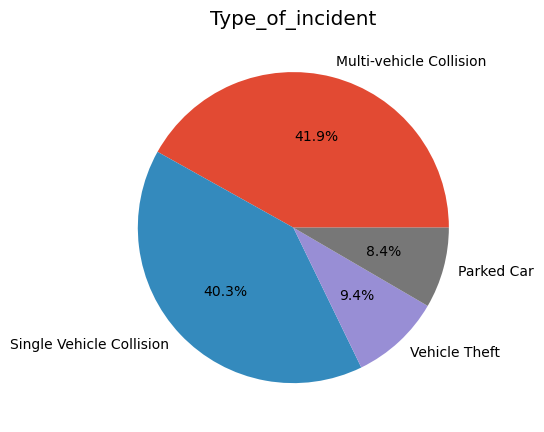

In [43]:
# Get the value counts of the variable you want to plot
value_counts = data['Type_of_incident'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Type_of_incident')

# Show the chart
plt.show()

In [44]:
data.Type_of_incident.value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: Type_of_incident, dtype: int64

**Plot of Severity_level**

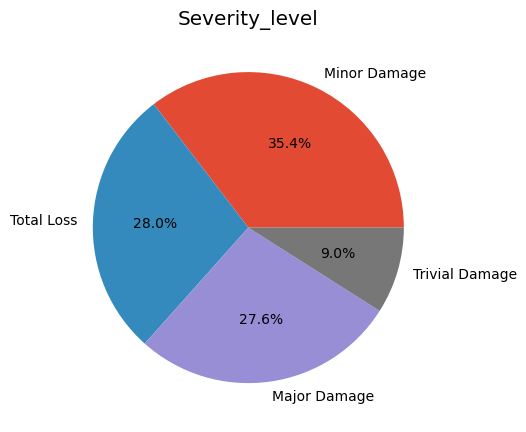

In [45]:
# Create a pie chart
# Get the value counts of the variable you want to plot
value_counts = data['Severity_level'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Severity_level')

# Show the chart
plt.show()

In [46]:
data.Severity_level.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: Severity_level, dtype: int64

**the claims made on minor damage is higher than other 3 types of damages**

**plot of Collision_mode**

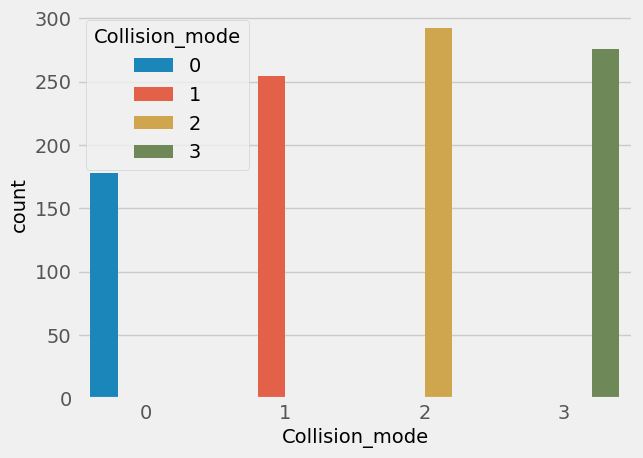

In [47]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Collision_mode', data=data, hue='Collision_mode')


**The higher number of claims are registered when rear collision happens**

**Plot of Auto_Producer**

Text(0.5, 1.0, 'Auto_Producer')

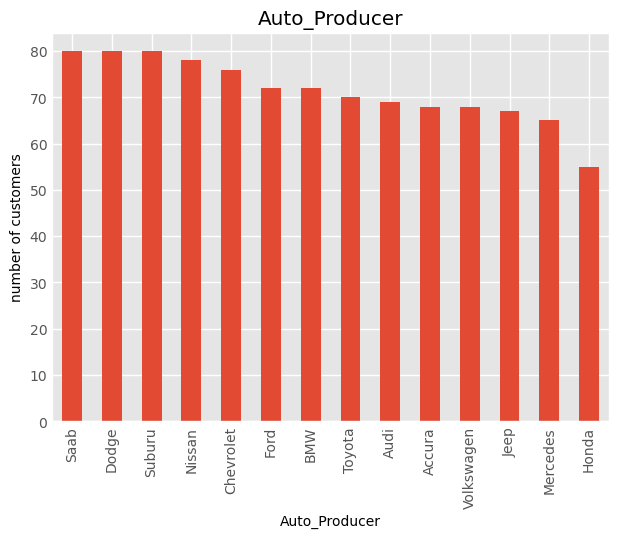

In [48]:
plt.style.use("ggplot")
data['Auto_Producer'].value_counts().plot(kind="bar")
plt.xlabel('Auto_Producer')
plt.ylabel("number of customers")
plt.title('Auto_Producer')

In [49]:
data.Auto_Producer.value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: Auto_Producer, dtype: int64

**The claims made on auto make saab,dodge,suburu,nissan are higher than other auto make**

Text(0.5, 1.0, 'Vehicle_year')

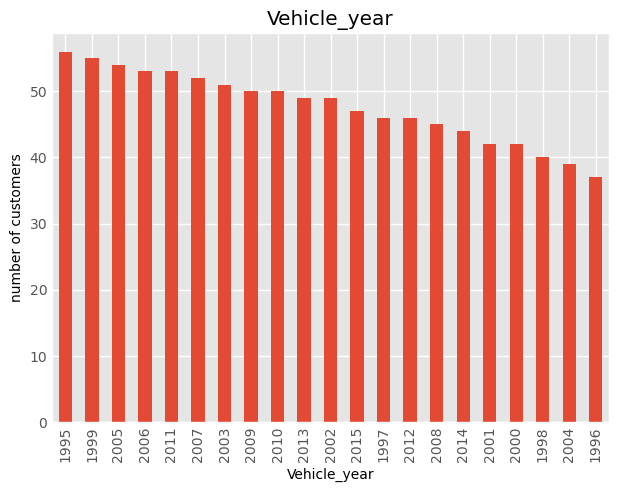

In [50]:
plt.style.use("ggplot")
data['Vehicle_year'].value_counts().plot(kind="bar")
plt.xlabel('Vehicle_year')
plt.ylabel("number of customers")
plt.title('Vehicle_year')

In [51]:
data.Vehicle_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: Vehicle_year, dtype: int64

Text(0.5, 1.0, 'Insured-Hobbies')

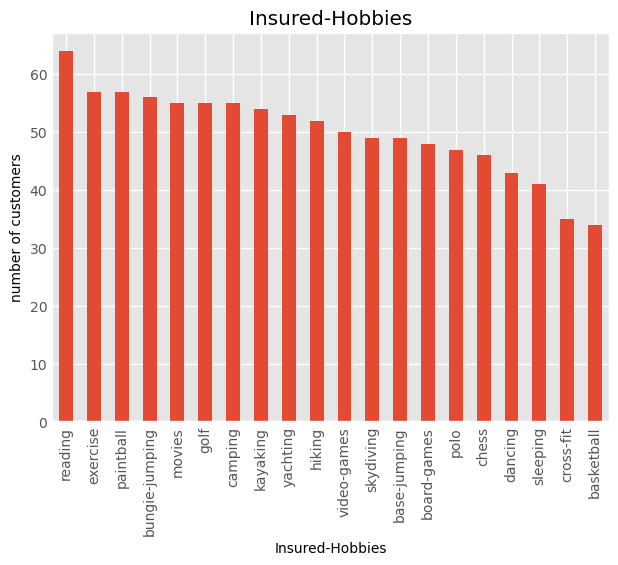

In [52]:
plt.style.use("ggplot")
data['Insured-Hobbies'].value_counts().plot(kind="bar")
plt.xlabel('Insured-Hobbies')
plt.ylabel("number of customers")
plt.title('Insured-Hobbies')

**Plot of Damage_to_property**

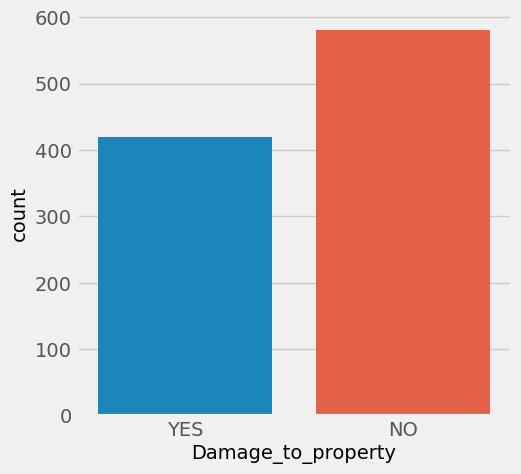

In [53]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='Damage_to_property', data=data)

**there are 415 claims are made where Damage_to_property is happned.**

In [54]:
data.Damage_to_property.value_counts()

NO     581
YES    419
Name: Damage_to_property, dtype: int64

Index(['Policy_combined_single_limit', 'Insured_profession', 'Insured-Hobbies',
       'Insured_kinship', 'Type_of_incident', 'Severity_level',
       'Contacted_Authorities', 'Damage_to_property',
       'Presence_of_police_report', 'Auto_Producer', 'Vehicle_Model',
       'Fraud_Reported'],
      dtype='object')


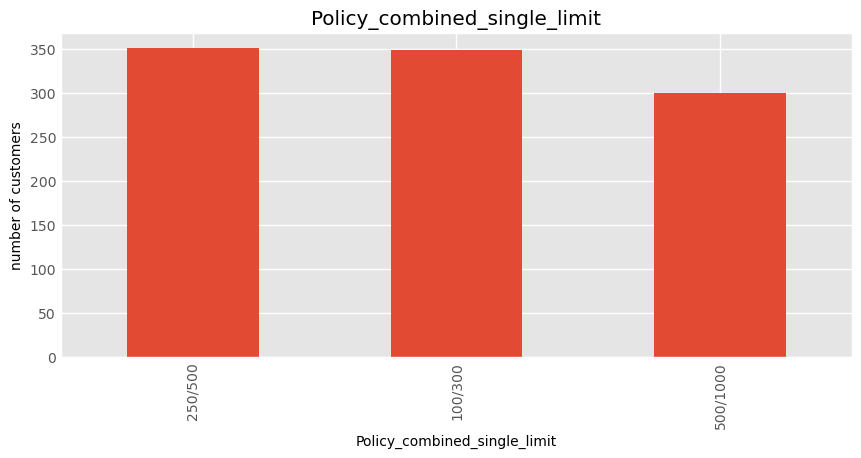

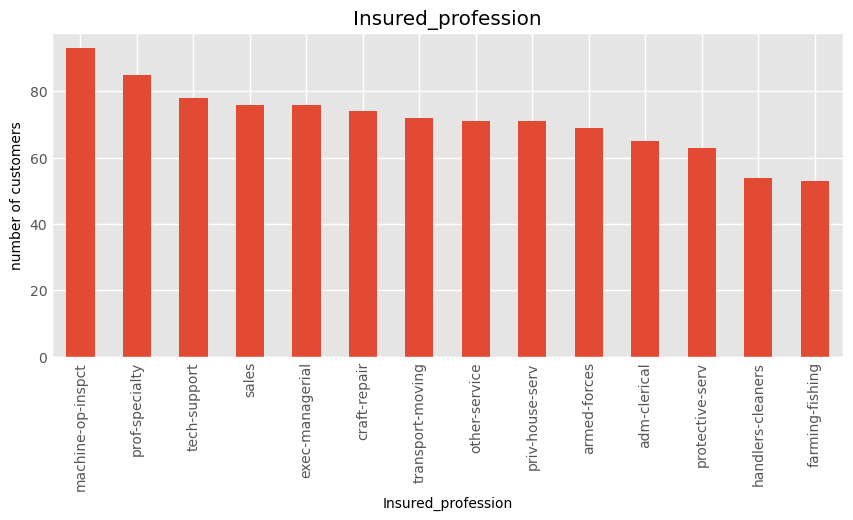

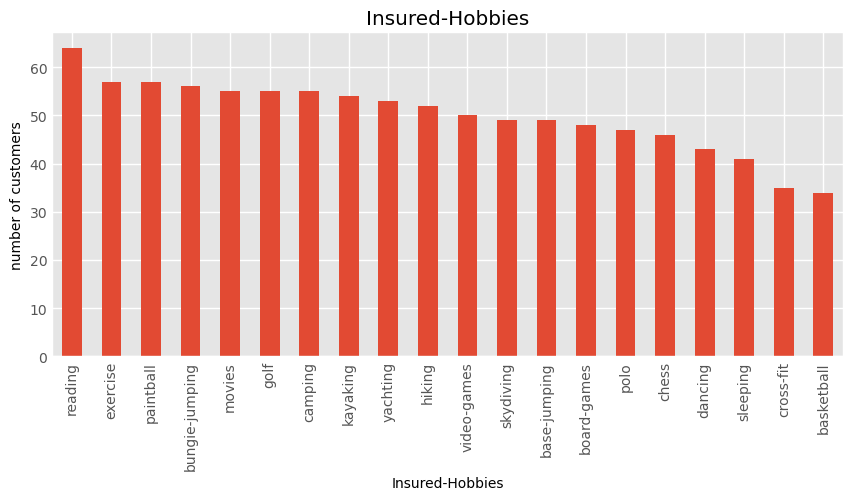

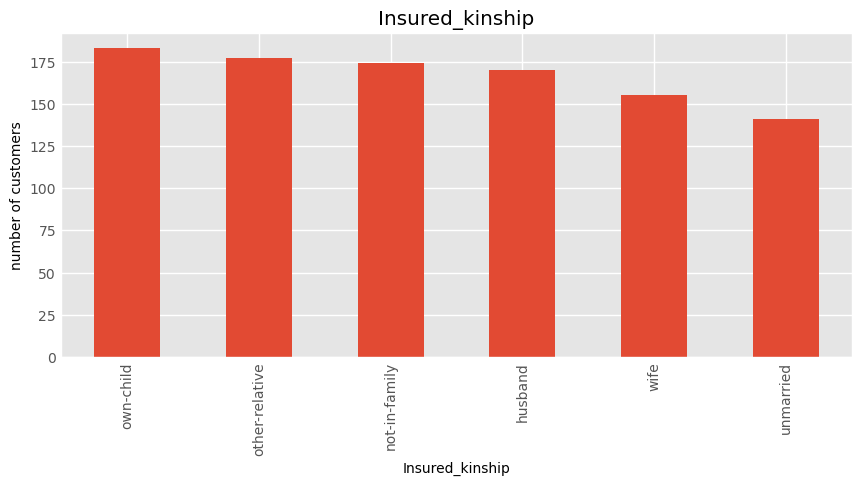

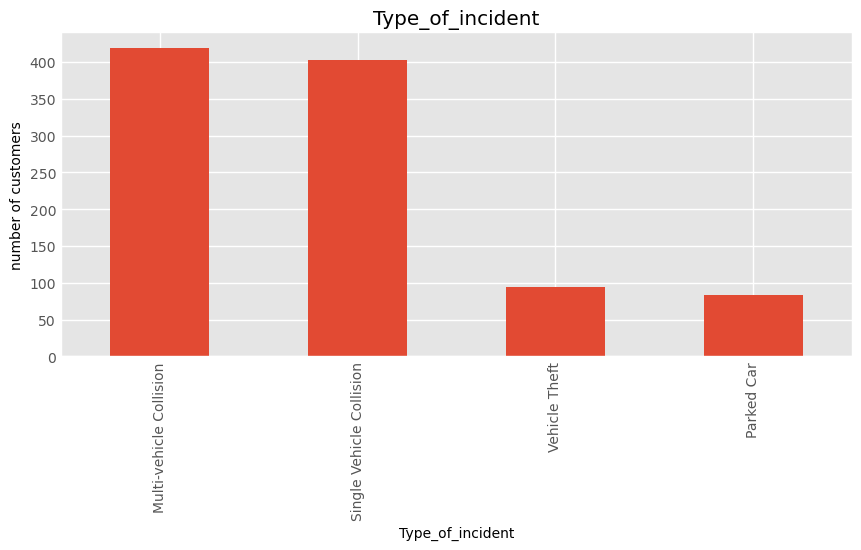

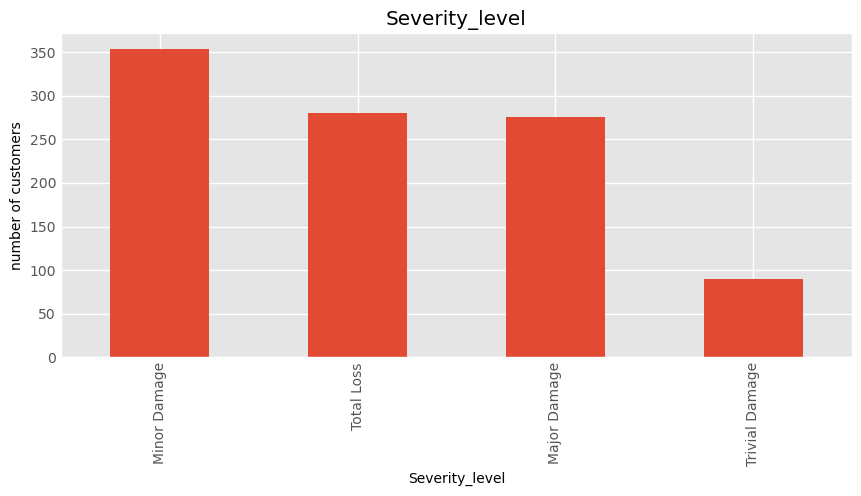

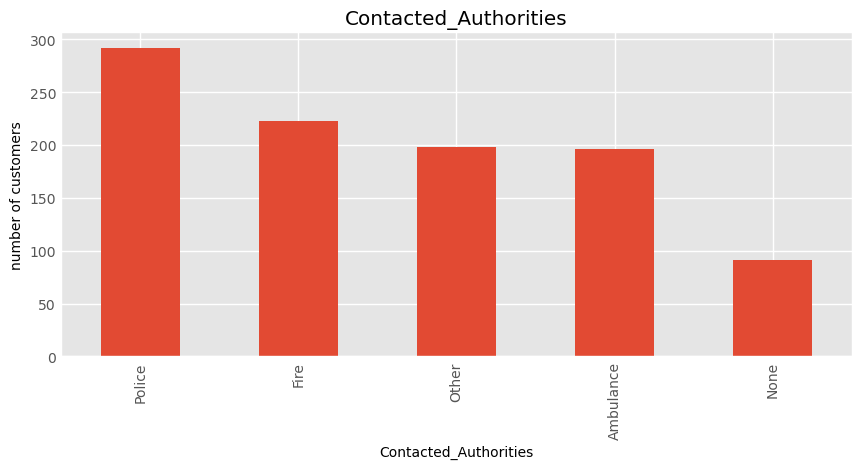

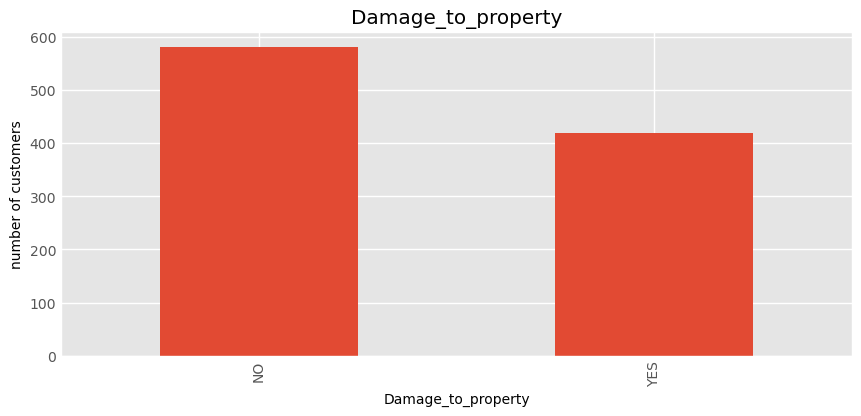

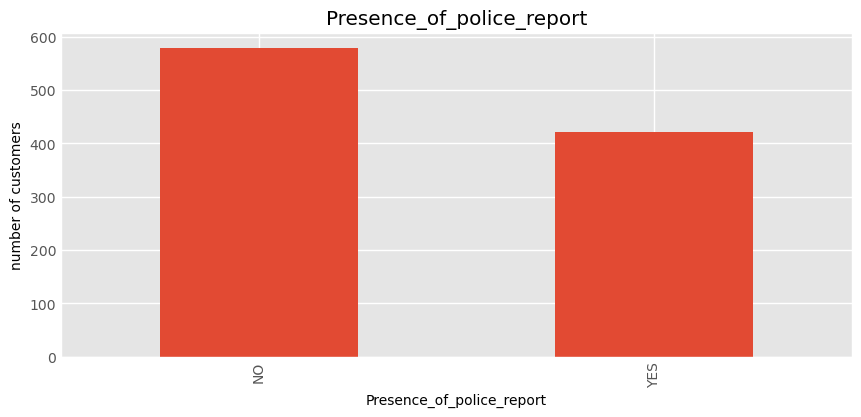

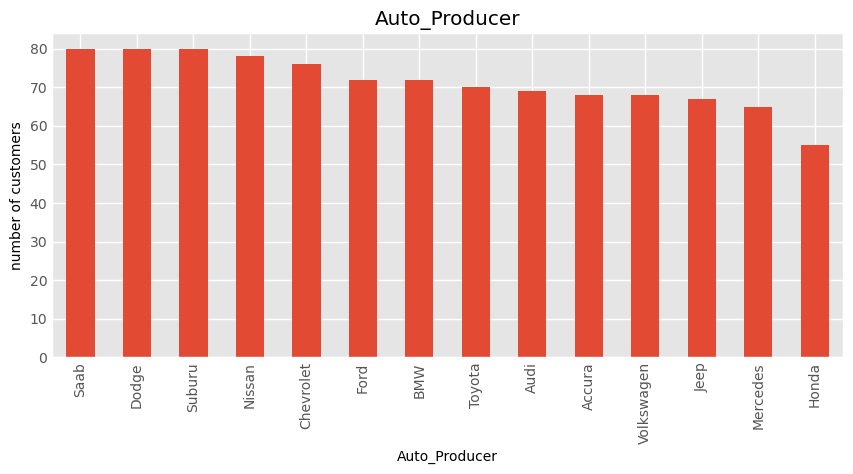

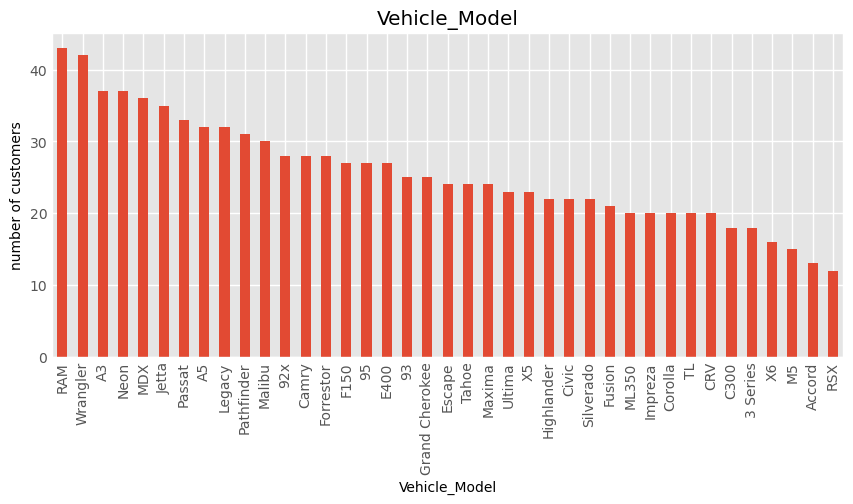

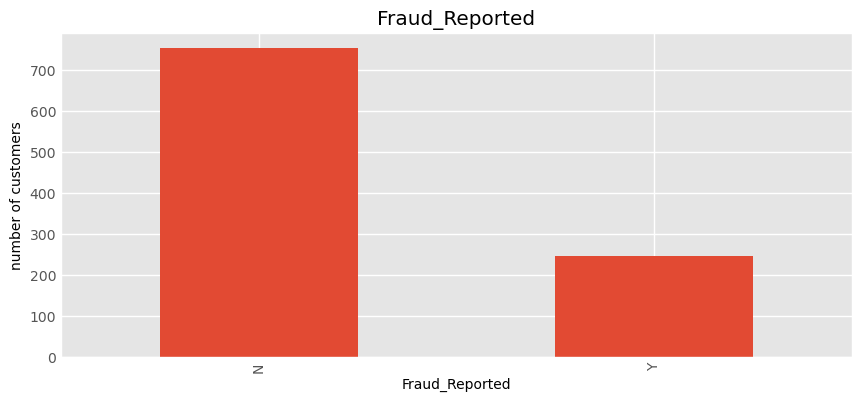

In [55]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

# Bivariate analysis

**plot of Fraud_Reported and Type_of_incident**

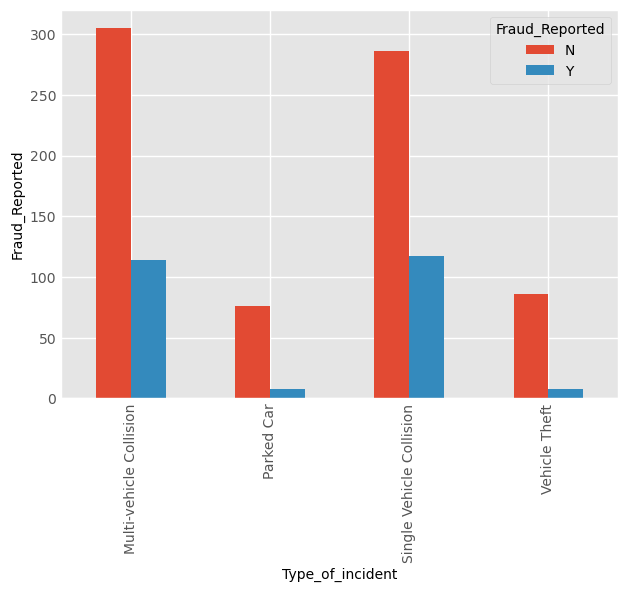

<Figure size 600x600 with 0 Axes>

In [56]:
import pandas as pd
pd.crosstab(data.Type_of_incident,data.Fraud_Reported).plot(kind='bar')

plt.xlabel('Type_of_incident')
plt.ylabel('Fraud_Reported')

fig = plt.figure(figsize=(6,6))

In [57]:
pd.crosstab(data['Fraud_Reported'], data['Type_of_incident'])

Type_of_incident,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
Fraud_Reported,,,,
N,305,76,286,86
Y,114,8,117,8


the maximum number of fraud is reported when single vehicle collision and multiple vehicle collision happened


**Plot of Severity_level vs Fraud_Reported**

Text(0, 0.5, 'Fraud_Reported')

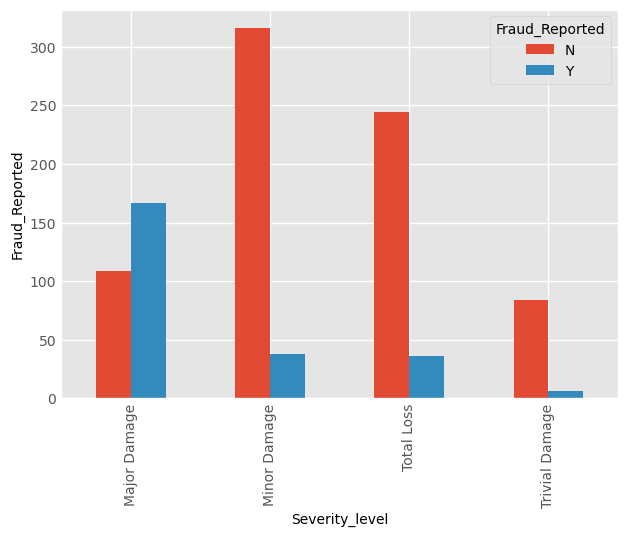

In [58]:
pd.crosstab(data.Severity_level,data.Fraud_Reported).plot(kind='bar')

plt.xlabel('Severity_level')
plt.ylabel('Fraud_Reported')


In [59]:
pd.crosstab(data['Severity_level'],data['Fraud_Reported'])

Fraud_Reported,N,Y
Severity_level,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


**The maximum number of fraud are reported when major damage is happened.**

**Plot of Collision_mode vs Fraud_Reported**

Text(0, 0.5, 'Fraud_Reported')

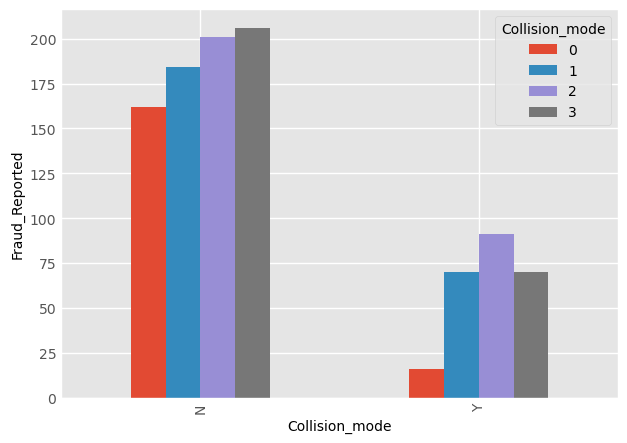

In [60]:
pd.crosstab(data.Fraud_Reported,data.Collision_mode).plot(kind='bar')

plt.xlabel('Collision_mode')
plt.ylabel('Fraud_Reported')


**The max number of frauds that is 91 are reported when rear collision happened**


In [61]:
pd.crosstab(data.Collision_mode,data.Fraud_Reported)


Fraud_Reported,N,Y
Collision_mode,,
0,162,16
1,184,70
2,201,91
3,206,70


**Plot of Presence_of_police_report vs Fraud_Reported**

Text(0, 0.5, 'Fraud_Reported')

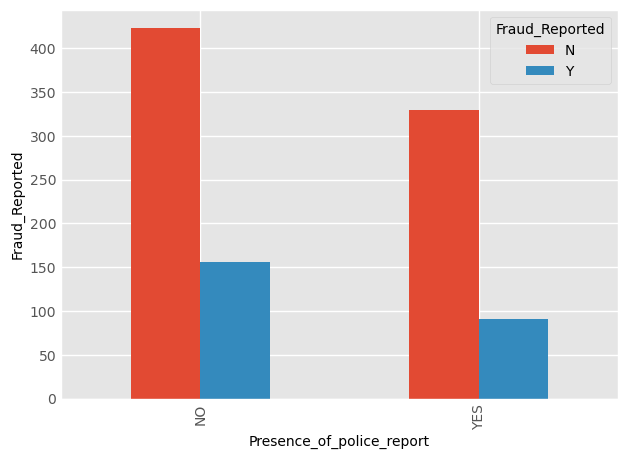

In [62]:
pd.crosstab(data.Presence_of_police_report,data.Fraud_Reported).plot(kind='bar')

plt.xlabel('Presence_of_police_report')
plt.ylabel('Fraud_Reported')


In [63]:
pd.crosstab(data.Presence_of_police_report,data.Fraud_Reported)

Fraud_Reported,N,Y
Presence_of_police_report,,
NO,423,156
YES,330,91


**Plot of Vehicle_year vs Fraud Reported**

Text(0, 0.5, 'Fraud_Reported')

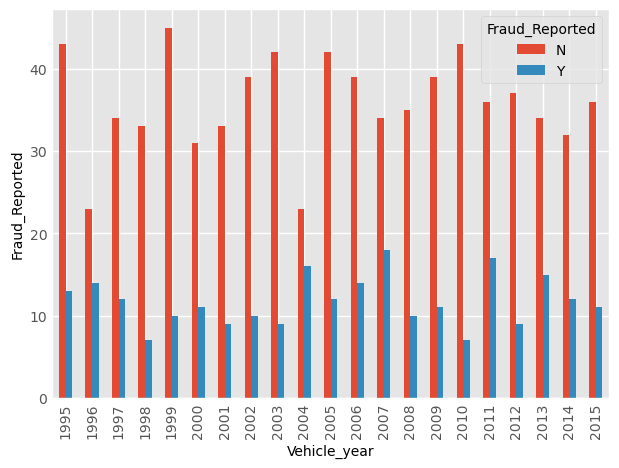

In [64]:
pd.crosstab(data.Vehicle_year,data.Fraud_Reported).plot(kind='bar')

plt.xlabel('Vehicle_year')
plt.ylabel('Fraud_Reported')


In [65]:
pd.crosstab(data['Vehicle_year'],data['Fraud_Reported'])

Fraud_Reported,N,Y
Vehicle_year,,
1995,43,13
1996,23,14
1997,34,12
1998,33,7
1999,45,10
2000,31,11
2001,33,9
2002,39,10
2003,42,9


**Plot of Auto producer vs Fraud_Reported**

Text(0, 0.5, 'Fraud_Reported')

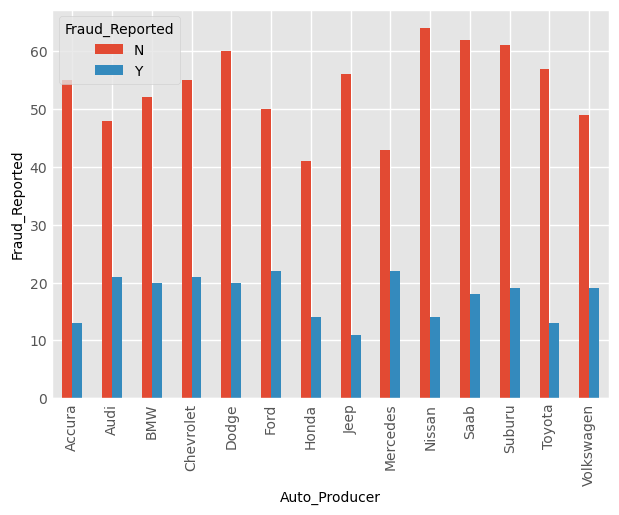

In [66]:
pd.crosstab(data.Auto_Producer,data.Fraud_Reported).plot(kind='bar')

plt.xlabel('Auto_Producer')
plt.ylabel('Fraud_Reported')


In [67]:
pd.crosstab(data['Auto_Producer'],data['Fraud_Reported'])

Fraud_Reported,N,Y
Auto_Producer,,
Accura,55,13
Audi,48,21
BMW,52,20
Chevrolet,55,21
Dodge,60,20
Ford,50,22
Honda,41,14
Jeep,56,11
Mercedes,43,22


**Plot of Vehicle_Model vs fraud reported**

Text(0, 0.5, 'Fraud_Reported')

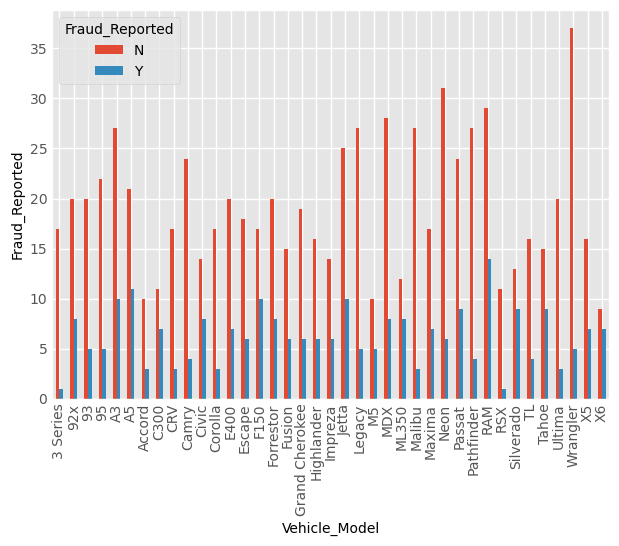

In [68]:
pd.crosstab(data.Vehicle_Model,data.Fraud_Reported).plot(kind='bar')

plt.xlabel('Vehicle_Model')
plt.ylabel('Fraud_Reported')


In [69]:
pd.crosstab(data.Vehicle_Model,data.Fraud_Reported)

Fraud_Reported,N,Y
Vehicle_Model,,
3 Series,17,1
92x,20,8
93,20,5
95,22,5
A3,27,10
A5,21,11
Accord,10,3
C300,11,7
CRV,17,3


**The maximun fraud are reported on ram model**

# Feature selection

In [70]:
y=data.iloc[:,-1]
y



0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: Fraud_Reported, Length: 1000, dtype: object

In [71]:
x=data.iloc[:,0:-1]
x

,Customer_duration,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year
0,328,250/500,1000,1406.91,0,craft-repair,sleeping,husband,Single Vehicle Collision,3,Major Damage,Police,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,250/500,2000,1197.22,5000000,machine-op-inspct,reading,other-relative,Vehicle Theft,0,Minor Damage,Police,1,YES,0,0,NO,5070,780,780,3510,Mercedes,E400,2007
2,134,100/300,2000,1413.14,5000000,sales,board-games,own-child,Multi-vehicle Collision,2,Minor Damage,Police,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,250/500,2000,1415.74,6000000,armed-forces,board-games,unmarried,Single Vehicle Collision,1,Major Damage,Police,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,500/1000,1000,1583.91,6000000,sales,board-games,unmarried,Vehicle Theft,0,Minor Damage,None,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,craft-repair,paintball,unmarried,Single Vehicle Collision,1,Minor Damage,Fire,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006
996,285,100/300,1000,1436.79,0,prof-specialty,sleeping,wife,Single Vehicle Collision,2,Major Damage,Fire,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015
997,130,250/500,500,1383.49,3000000,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,3,Minor Damage,Police,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996
998,458,500/1000,2000,1356.92,5000000,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,2,Major Damage,Other,1,YES,0,1,YES,46980,5220,5220,36540,Audi,A5,1998


In [72]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [73]:
cat_col=data.select_dtypes(include=['object'])
cat_col

,Policy_combined_single_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Type_of_incident,Severity_level,Contacted_Authorities,Damage_to_property,Presence_of_police_report,Auto_Producer,Vehicle_Model,Fraud_Reported
0,250/500,craft-repair,sleeping,husband,Single Vehicle Collision,Major Damage,Police,YES,YES,Saab,92x,Y
1,250/500,machine-op-inspct,reading,other-relative,Vehicle Theft,Minor Damage,Police,YES,NO,Mercedes,E400,Y
2,100/300,sales,board-games,own-child,Multi-vehicle Collision,Minor Damage,Police,NO,NO,Dodge,RAM,N
3,250/500,armed-forces,board-games,unmarried,Single Vehicle Collision,Major Damage,Police,NO,NO,Chevrolet,Tahoe,Y
4,500/1000,sales,board-games,unmarried,Vehicle Theft,Minor Damage,None,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,craft-repair,paintball,unmarried,Single Vehicle Collision,Minor Damage,Fire,YES,NO,Honda,Accord,N
996,100/300,prof-specialty,sleeping,wife,Single Vehicle Collision,Major Damage,Fire,YES,NO,Volkswagen,Passat,N
997,250/500,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Minor Damage,Police,NO,YES,Suburu,Impreza,N
998,500/1000,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Major Damage,Other,YES,YES,Audi,A5,N


In [74]:
# Create a list of categorical columns in the dataset
cat_cols = ['Policy_combined_single_limit','Insured_kinship','Insured_profession','Insured-Hobbies','Type_of_incident','Severity_level','Contacted_Authorities','Damage_to_property','Presence_of_police_report','Auto_Producer','Vehicle_Model']
           

In [75]:
# Encode the categorical columns
for col in cat_cols:
    x[col] = label_encoder.fit_transform(x[col])
    
    

In [76]:
x

,Customer_duration,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Type_of_incident,Collision_mode,Severity_level,Contacted_Authorities,Vehicle_participation,Damage_to_property,Physical_injury,Witnesses_present,Presence_of_police_report,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year
0,328,1,1000,1406.91,0,2,17,0,2,3,0,4,1,1,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,1,2000,1197.22,5000000,6,15,2,3,0,1,4,1,1,0,0,0,5070,780,780,3510,8,12,2007
2,134,0,2000,1413.14,5000000,11,2,3,0,2,1,4,3,0,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,1,2000,1415.74,6000000,1,2,4,2,1,0,4,1,0,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,2,1000,1583.91,6000000,11,2,4,3,0,1,2,1,0,0,1,0,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,1000,1310.80,0,2,13,4,2,1,1,1,1,1,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,0,1000,1436.79,0,9,17,5,2,2,0,1,1,1,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,1,500,1383.49,3000000,1,3,2,0,3,1,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996
998,458,2,2000,1356.92,5000000,5,0,5,2,2,0,3,1,1,0,1,1,46980,5220,5220,36540,1,5,1998


# Recursive Feature Elimination (RFE)

In [77]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [78]:
# Create a model suitable for mixed types of data
model = RandomForestClassifier()  # You can choose a different model based on your requirements


In [79]:
# Specify the number of features to select
n_features =20
# Apply RFE to select the top n_features features
rfe = RFE(estimator=model, n_features_to_select=n_features)
selected_features = rfe.fit_transform(x, y)
selected_features

array([[3.280e+02, 1.000e+00, 1.000e+03, ..., 1.000e+01, 1.000e+00,
        2.004e+03],
       [2.280e+02, 1.000e+00, 2.000e+03, ..., 8.000e+00, 1.200e+01,
        2.007e+03],
       [1.340e+02, 0.000e+00, 2.000e+03, ..., 4.000e+00, 3.000e+01,
        2.007e+03],
       ...,
       [1.300e+02, 1.000e+00, 5.000e+02, ..., 1.100e+01, 1.900e+01,
        1.996e+03],
       [4.580e+02, 2.000e+00, 2.000e+03, ..., 1.000e+00, 5.000e+00,
        1.998e+03],
       [4.560e+02, 1.000e+00, 1.000e+03, ..., 8.000e+00, 1.200e+01,
        2.007e+03]])

In [80]:
# Get the column names of the selected features
selected_feature_names = x.columns[rfe.support_].tolist()
selected_feature_names


['Customer_duration',
 'Policy_combined_single_limit',
 'Policy_deductable_amount',
 'Policy_premium_per_year',
 'Umbrella_insurance_limit',
 'Insured_profession',
 'Insured-Hobbies',
 'Insured_kinship',
 'Collision_mode',
 'Severity_level',
 'Contacted_Authorities',
 'Physical_injury',
 'Witnesses_present',
 'Total_Claim',
 'Bodily_Injury_Claim',
 'Property_Damage_Claim',
 'Vehicle_Damage_Claim',
 'Auto_Producer',
 'Vehicle_Model',
 'Vehicle_year']

In [81]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Create a base model (you can choose a different model based on your requirements)
model = RandomForestClassifier()

# Specify the number of features to select
n_features = 20

# Apply RFE to select the top n_features features
rfe = RFE(estimator=model, n_features_to_select=n_features)
X_selected = rfe.fit_transform(x, y)
 
# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the selected feature names
selected_features = x.columns[selected_feature_indices].tolist()
selected_features

['Customer_duration',
 'Policy_combined_single_limit',
 'Policy_deductable_amount',
 'Policy_premium_per_year',
 'Umbrella_insurance_limit',
 'Insured_profession',
 'Insured-Hobbies',
 'Insured_kinship',
 'Collision_mode',
 'Severity_level',
 'Contacted_Authorities',
 'Physical_injury',
 'Witnesses_present',
 'Total_Claim',
 'Bodily_Injury_Claim',
 'Property_Damage_Claim',
 'Vehicle_Damage_Claim',
 'Auto_Producer',
 'Vehicle_Model',
 'Vehicle_year']

In [82]:
data.drop(['Damage_to_property','Presence_of_police_report','Type_of_incident','Vehicle_participation'],axis=1,inplace=True)

# Balancing the impalanced data

In [83]:
data

,Customer_duration,Policy_combined_single_limit,Policy_deductable_amount,Policy_premium_per_year,Umbrella_insurance_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Collision_mode,Severity_level,Contacted_Authorities,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Auto_Producer,Vehicle_Model,Vehicle_year,Fraud_Reported
0,328,250/500,1000,1406.91,0,craft-repair,sleeping,husband,3,Major Damage,Police,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,250/500,2000,1197.22,5000000,machine-op-inspct,reading,other-relative,0,Minor Damage,Police,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,100/300,2000,1413.14,5000000,sales,board-games,own-child,2,Minor Damage,Police,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,250/500,2000,1415.74,6000000,armed-forces,board-games,unmarried,1,Major Damage,Police,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,500/1000,1000,1583.91,6000000,sales,board-games,unmarried,0,Minor Damage,None,0,1,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,craft-repair,paintball,unmarried,1,Minor Damage,Fire,0,1,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,100/300,1000,1436.79,0,prof-specialty,sleeping,wife,2,Major Damage,Fire,2,3,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,250/500,500,1383.49,3000000,armed-forces,bungie-jumping,other-relative,3,Minor Damage,Police,2,3,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,500/1000,2000,1356.92,5000000,handlers-cleaners,base-jumping,wife,2,Major Damage,Other,0,1,46980,5220,5220,36540,Audi,A5,1998,N


In [84]:
cat_col=data.select_dtypes(include=['object'])

In [85]:
cat_col

,Policy_combined_single_limit,Insured_profession,Insured-Hobbies,Insured_kinship,Severity_level,Contacted_Authorities,Auto_Producer,Vehicle_Model,Fraud_Reported
0,250/500,craft-repair,sleeping,husband,Major Damage,Police,Saab,92x,Y
1,250/500,machine-op-inspct,reading,other-relative,Minor Damage,Police,Mercedes,E400,Y
2,100/300,sales,board-games,own-child,Minor Damage,Police,Dodge,RAM,N
3,250/500,armed-forces,board-games,unmarried,Major Damage,Police,Chevrolet,Tahoe,Y
4,500/1000,sales,board-games,unmarried,Minor Damage,None,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...
995,500/1000,craft-repair,paintball,unmarried,Minor Damage,Fire,Honda,Accord,N
996,100/300,prof-specialty,sleeping,wife,Major Damage,Fire,Volkswagen,Passat,N
997,250/500,armed-forces,bungie-jumping,other-relative,Minor Damage,Police,Suburu,Impreza,N
998,500/1000,handlers-cleaners,base-jumping,wife,Major Damage,Other,Audi,A5,N


In [86]:
dummy_data=pd.get_dummies(data[['Policy_combined_single_limit','Insured_kinship','Insured_profession','Insured-Hobbies','Severity_level','Contacted_Authorities','Auto_Producer','Vehicle_Model']])

In [87]:
dummy_data

,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6
0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [88]:
num_col=data.select_dtypes(include=['int64'])
num_col


,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year
0,328,1000,0,1,2,71610,6510,13020,52080,2004
1,228,2000,5000000,0,0,5070,780,780,3510,2007
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014
4,228,1000,6000000,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,1,87200,17440,8720,61040,2006
996,285,1000,0,2,3,108480,18080,18080,72320,2015
997,130,500,3000000,2,3,67500,7500,7500,52500,1996
998,458,2000,5000000,0,1,46980,5220,5220,36540,1998


In [89]:
new_data=pd.concat([num_col,dummy_data],axis=1)
new_data

,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6
0,328,1000,0,1,2,71610,6510,13020,52080,2004,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,2000,5000000,0,0,5070,780,780,3510,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,1000,6000000,0,1,6500,1300,650,4550,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [90]:
new_data=new_data.join(data[['Fraud_Reported']])

In [91]:
new_data

,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6,Fraud_Reported
0,328,1000,0,1,2,71610,6510,13020,52080,2004,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y
1,228,2000,5000000,0,0,5070,780,780,3510,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,N
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Y
4,228,1000,6000000,0,1,6500,1300,650,4550,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [92]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list=["Fraud_Reported"]
for i in list:
    le=preprocessing.LabelEncoder()
    le.fit(new_data[i])
    
    new_data[i]=le.transform(new_data[i])
new_data

,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6,Fraud_Reported
0,328,1000,0,1,2,71610,6510,13020,52080,2004,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,228,2000,5000000,0,0,5070,780,780,3510,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,228,1000,6000000,0,1,6500,1300,650,4550,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [93]:
new_data

,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6,Fraud_Reported
0,328,1000,0,1,2,71610,6510,13020,52080,2004,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,228,2000,5000000,0,0,5070,780,780,3510,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,228,1000,6000000,0,1,6500,1300,650,4550,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [94]:
new_data.to_csv('insurance_new.csv',index=False)

In [95]:
x=new_data.iloc[:,0:-1]



In [96]:
x

,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6
0,328,1000,0,1,2,71610,6510,13020,52080,2004,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,2000,5000000,0,0,5070,780,780,3510,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,1000,6000000,0,1,6500,1300,650,4550,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [97]:
len(x.columns)

115

In [98]:
y=new_data.iloc[:,-1]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Fraud_Reported, Length: 1000, dtype: int32

In [99]:
!pip install imblearn

In [100]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 753, 1: 247})
Counter({1: 753, 0: 753})


# Model creation and Model Evaluation



# 1) Logistic Regression 

In [101]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [102]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.156217
         Iterations: 35
                                               Results: Logit
Model:                            Logit                          Pseudo R-squared:               0.775      
Dependent Variable:               Fraud_Reported                 AIC:                            598.1709   
Date:                             2023-06-15 08:47               BIC:                            1163.5388  
No. Observations:                 1204                           Log-Likelihood:                 -188.09    
Df Model:                         110                            LL-Null:                        -834.41    
Df Residuals:                     1093                           LLR p-value:                    5.5182e-201
Converged:                        0.0000                         Scale:                          1.0000     
No. Iterations:                   35.0000                                                                   


C:\Users\akash\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\akash\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,f1_score ,recall_score

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[70 72]
 [71 89]]


In [107]:
recall=recall_score(y_test,y_pred)
recall

0.55625

In [108]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5264900662251656

In [109]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       142
           1       0.55      0.56      0.55       160

    accuracy                           0.53       302
   macro avg       0.52      0.52      0.52       302
weighted avg       0.53      0.53      0.53       302



# The above result we got are after using SMOTE technique 

# Now we are going to fit logistic model without using smote technique

In [111]:
x=new_data.iloc[:,0:-1]
y=new_data.iloc[:,-1]

In [112]:
x

,Customer_duration,Policy_deductable_amount,Umbrella_insurance_limit,Physical_injury,Witnesses_present,Total_Claim,Bodily_Injury_Claim,Property_Damage_Claim,Vehicle_Damage_Claim,Vehicle_year,Policy_combined_single_limit_100/300,Policy_combined_single_limit_250/500,Policy_combined_single_limit_500/1000,Insured_kinship_husband,Insured_kinship_not-in-family,Insured_kinship_other-relative,Insured_kinship_own-child,Insured_kinship_unmarried,Insured_kinship_wife,Insured_profession_adm-clerical,Insured_profession_armed-forces,Insured_profession_craft-repair,Insured_profession_exec-managerial,Insured_profession_farming-fishing,Insured_profession_handlers-cleaners,Insured_profession_machine-op-inspct,Insured_profession_other-service,Insured_profession_priv-house-serv,Insured_profession_prof-specialty,Insured_profession_protective-serv,Insured_profession_sales,Insured_profession_tech-support,Insured_profession_transport-moving,Insured-Hobbies_base-jumping,Insured-Hobbies_basketball,Insured-Hobbies_board-games,Insured-Hobbies_bungie-jumping,Insured-Hobbies_camping,Insured-Hobbies_chess,Insured-Hobbies_cross-fit,Insured-Hobbies_dancing,Insured-Hobbies_exercise,Insured-Hobbies_golf,Insured-Hobbies_hiking,Insured-Hobbies_kayaking,Insured-Hobbies_movies,Insured-Hobbies_paintball,Insured-Hobbies_polo,Insured-Hobbies_reading,Insured-Hobbies_skydiving,Insured-Hobbies_sleeping,Insured-Hobbies_video-games,Insured-Hobbies_yachting,Severity_level_Major Damage,Severity_level_Minor Damage,Severity_level_Total Loss,Severity_level_Trivial Damage,Contacted_Authorities_Ambulance,Contacted_Authorities_Fire,Contacted_Authorities_None,Contacted_Authorities_Other,Contacted_Authorities_Police,Auto_Producer_Accura,Auto_Producer_Audi,Auto_Producer_BMW,Auto_Producer_Chevrolet,Auto_Producer_Dodge,Auto_Producer_Ford,Auto_Producer_Honda,Auto_Producer_Jeep,Auto_Producer_Mercedes,Auto_Producer_Nissan,Auto_Producer_Saab,Auto_Producer_Suburu,Auto_Producer_Toyota,Auto_Producer_Volkswagen,Vehicle_Model_3 Series,Vehicle_Model_92x,Vehicle_Model_93,Vehicle_Model_95,Vehicle_Model_A3,Vehicle_Model_A5,Vehicle_Model_Accord,Vehicle_Model_C300,Vehicle_Model_CRV,Vehicle_Model_Camry,Vehicle_Model_Civic,Vehicle_Model_Corolla,Vehicle_Model_E400,Vehicle_Model_Escape,Vehicle_Model_F150,Vehicle_Model_Forrestor,Vehicle_Model_Fusion,Vehicle_Model_Grand Cherokee,Vehicle_Model_Highlander,Vehicle_Model_Impreza,Vehicle_Model_Jetta,Vehicle_Model_Legacy,Vehicle_Model_M5,Vehicle_Model_MDX,Vehicle_Model_ML350,Vehicle_Model_Malibu,Vehicle_Model_Maxima,Vehicle_Model_Neon,Vehicle_Model_Passat,Vehicle_Model_Pathfinder,Vehicle_Model_RAM,Vehicle_Model_RSX,Vehicle_Model_Silverado,Vehicle_Model_TL,Vehicle_Model_Tahoe,Vehicle_Model_Ultima,Vehicle_Model_Wrangler,Vehicle_Model_X5,Vehicle_Model_X6
0,328,1000,0,1,2,71610,6510,13020,52080,2004,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,2000,5000000,0,0,5070,780,780,3510,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,2000,5000000,2,3,34650,7700,3850,23100,2007,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,2000,6000000,1,2,63400,6340,6340,50720,2014,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,1000,6000000,0,1,6500,1300,650,4550,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [114]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249945
         Iterations 11
                                             Results: Logit
Model:                            Logit                         Pseudo R-squared:              0.546     
Dependent Variable:               Fraud_Reported                AIC:                           564.9169  
Date:                             2023-06-15 08:47              BIC:                           1003.8238 
No. Observations:                 750                           Log-Likelihood:                -187.46   
Df Model:                         94                            LL-Null:                       -413.31   
Df Residuals:                     655                           LLR p-value:                   3.5280e-48
Converged:                        1.0000                        Scale:                         1.0000    
No. Iterations:                   11.0000                                                      

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\akash\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [207]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [208]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [209]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[181   2]
 [ 67   0]]


In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.99      0.84       183
           1       0.00      0.00      0.00        67

    accuracy                           0.72       250
   macro avg       0.36      0.49      0.42       250
weighted avg       0.53      0.72      0.61       250



In [206]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report, roc_curve, roc_auc_score
Recall = recall_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.0

In [121]:
accuracy = accuracy_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
accuracy

0.724

In [122]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       183
           1       0.00      0.00      0.00        67

    accuracy                           0.72       250
   macro avg       0.36      0.49      0.42       250
weighted avg       0.53      0.72      0.61       250



# HyperParameter  tunning in logistic regression


In [123]:
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.2, random_state=42)
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [124]:
from sklearn.model_selection import StratifiedKFold

In [125]:
# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(x_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.5891915219105777
best parameters are: {'C': 0.1, 'penalty': 'l2'}


C:\Users\akash\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akash\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akash\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\akash\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

In [126]:
# checking model performance
y_pred= gridsearch_log.predict(x_test)

y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [127]:

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5364238410596026
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       142
           1       0.56      0.57      0.57       160

    accuracy                           0.54       302
   macro avg       0.53      0.53      0.53       302
weighted avg       0.54      0.54      0.54       302



[[71 71]
 [69 91]]


<Axes: >

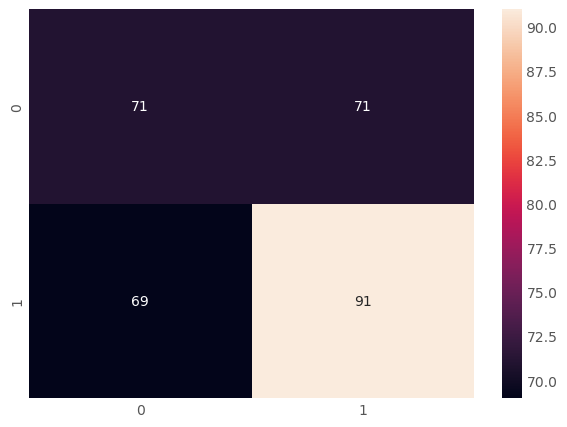

In [128]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [129]:
#checking performance of best paramters on model
model=LogisticRegression( C= 10.0, penalty='l2')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [130]:
print("Accuracy_score:{:.2f}".format(accuracy_score(y_test,y_pred)*100))

Accuracy_score:52.65


[[70 72]
 [71 89]]
0.5264900662251656
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       142
           1       0.55      0.56      0.55       160

    accuracy                           0.53       302
   macro avg       0.52      0.52      0.52       302
weighted avg       0.53      0.53      0.53       302



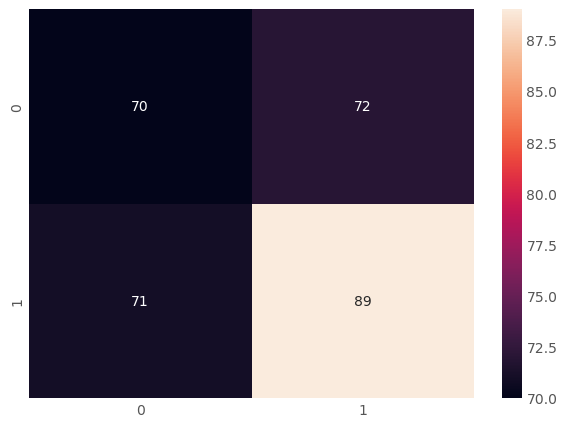

In [131]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix
[[70 72]
 [71 89]]


<Figure size 640x480 with 0 Axes>

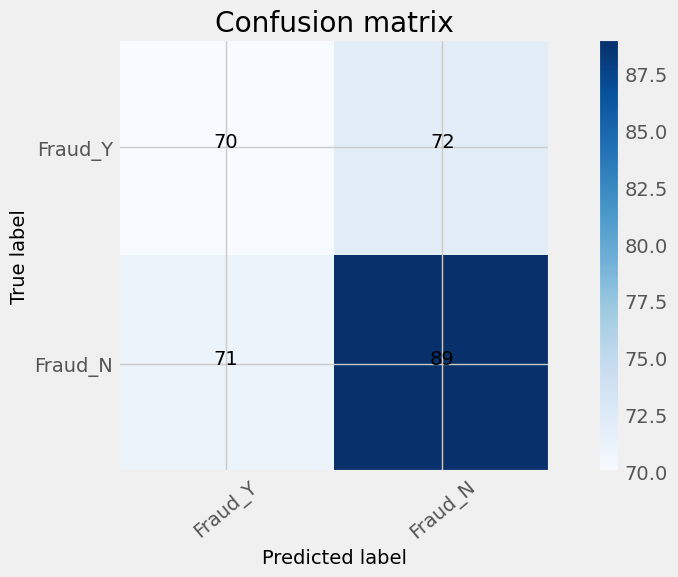

In [132]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

# 2) Decision Tree Classifier

In [133]:

x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.2, random_state=42)


In [134]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_hat=dt.predict(x_test)#prediction
y_hat#predicted values 

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [135]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(x_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.9426910299003323

In [136]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       611
           1       0.95      0.93      0.94       593

    accuracy                           0.94      1204
   macro avg       0.94      0.94      0.94      1204
weighted avg       0.94      0.94      0.94      1204



In [137]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
Fraud_Reported,,
0,583,28
1,41,552


In [138]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.9411764705882353

In [139]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.8410596026490066

In [140]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.8461538461538461

In [141]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat))

[[122  20]
 [ 28 132]]


In [142]:
print(classification_report(y_test,y_hat))# for  testing

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       142
           1       0.87      0.82      0.85       160

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



In [143]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
Fraud_Reported,,
0,122,20
1,28,132


In [144]:
from sklearn.model_selection import cross_val_score




# Perform cross-validation using 5 folds
cv_scores = cross_val_score(dt, x, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)

# Calculate the mean of the cross-validation scores
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score: ", mean_cv_score)

Cross-validation scores:  [0.83 0.79 0.8  0.84 0.78]
Mean cross-validation score:  0.8089999999999999


# Hyperparameter Tunning of DecisionTree

In [145]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [146]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":np.arange(1, 20), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":np.arange(1, 20),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

In [147]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds


In [148]:
tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [149]:
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})


In [150]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [151]:
tree_cv.fit(x_train,y_train)#getting best score from cv

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [152]:
tree_cv.best_score_#getting best score from cv



0.8870433433664586

In [153]:
#evaluating best paramters on model
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 5,splitter= 'best')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [154]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [155]:
acc_test=accuracy_score(y_test,y_pred)#checking accuracy
acc_test

0.847682119205298

In [156]:
test_f1=f1_score(y_test,y_pred)#f1_score
test_f1

0.8553459119496856

In [157]:
print(classification_report(y_test,y_pred))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       142
           1       0.86      0.85      0.86       160

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



Confusion matrix
[[120  22]
 [ 24 136]]


<Figure size 640x480 with 0 Axes>

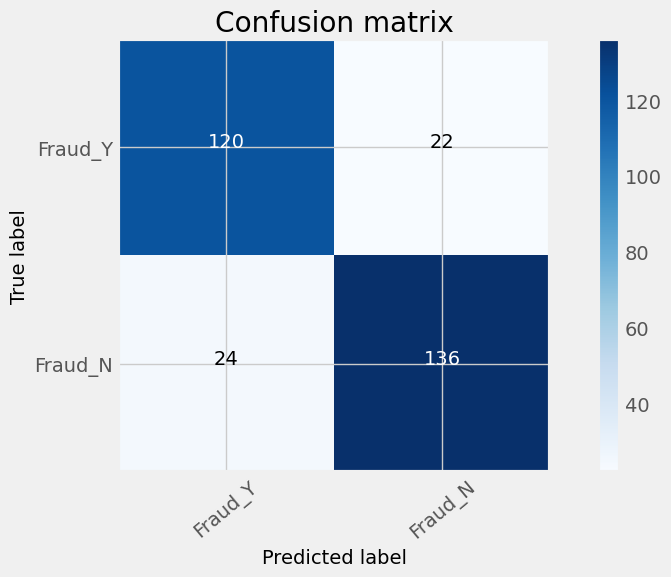

In [158]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

[Text(0.6077586206896551, 0.9166666666666666, 'x[54] <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [611, 593]'),
 Text(0.35344827586206895, 0.75, 'x[55] <= 0.5\ngini = 0.474\nsamples = 902\nvalue = [349, 553]'),
 Text(0.1724137931034483, 0.5833333333333334, 'x[56] <= 0.5\ngini = 0.361\nsamples = 665\nvalue = [157, 508]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[53] <= 0.5\ngini = 0.251\nsamples = 591\nvalue = [87, 504]'),
 Text(0.034482758620689655, 0.25, 'gini = 0.0\nsamples = 195\nvalue = [0, 195]'),
 Text(0.10344827586206896, 0.25, 'x[16] <= 0.5\ngini = 0.343\nsamples = 396\nvalue = [87, 309]'),
 Text(0.06896551724137931, 0.08333333333333333, 'gini = 0.3\nsamples = 359\nvalue = [66, 293]'),
 Text(0.13793103448275862, 0.08333333333333333, 'gini = 0.491\nsamples = 37\nvalue = [21, 16]'),
 Text(0.27586206896551724, 0.4166666666666667, 'x[38] <= 0.5\ngini = 0.102\nsamples = 74\nvalue = [70, 4]'),
 Text(0.2413793103448276, 0.25, 'x[39] <= 0.5\ngini = 0.054\nsamples = 72\nvalue = 

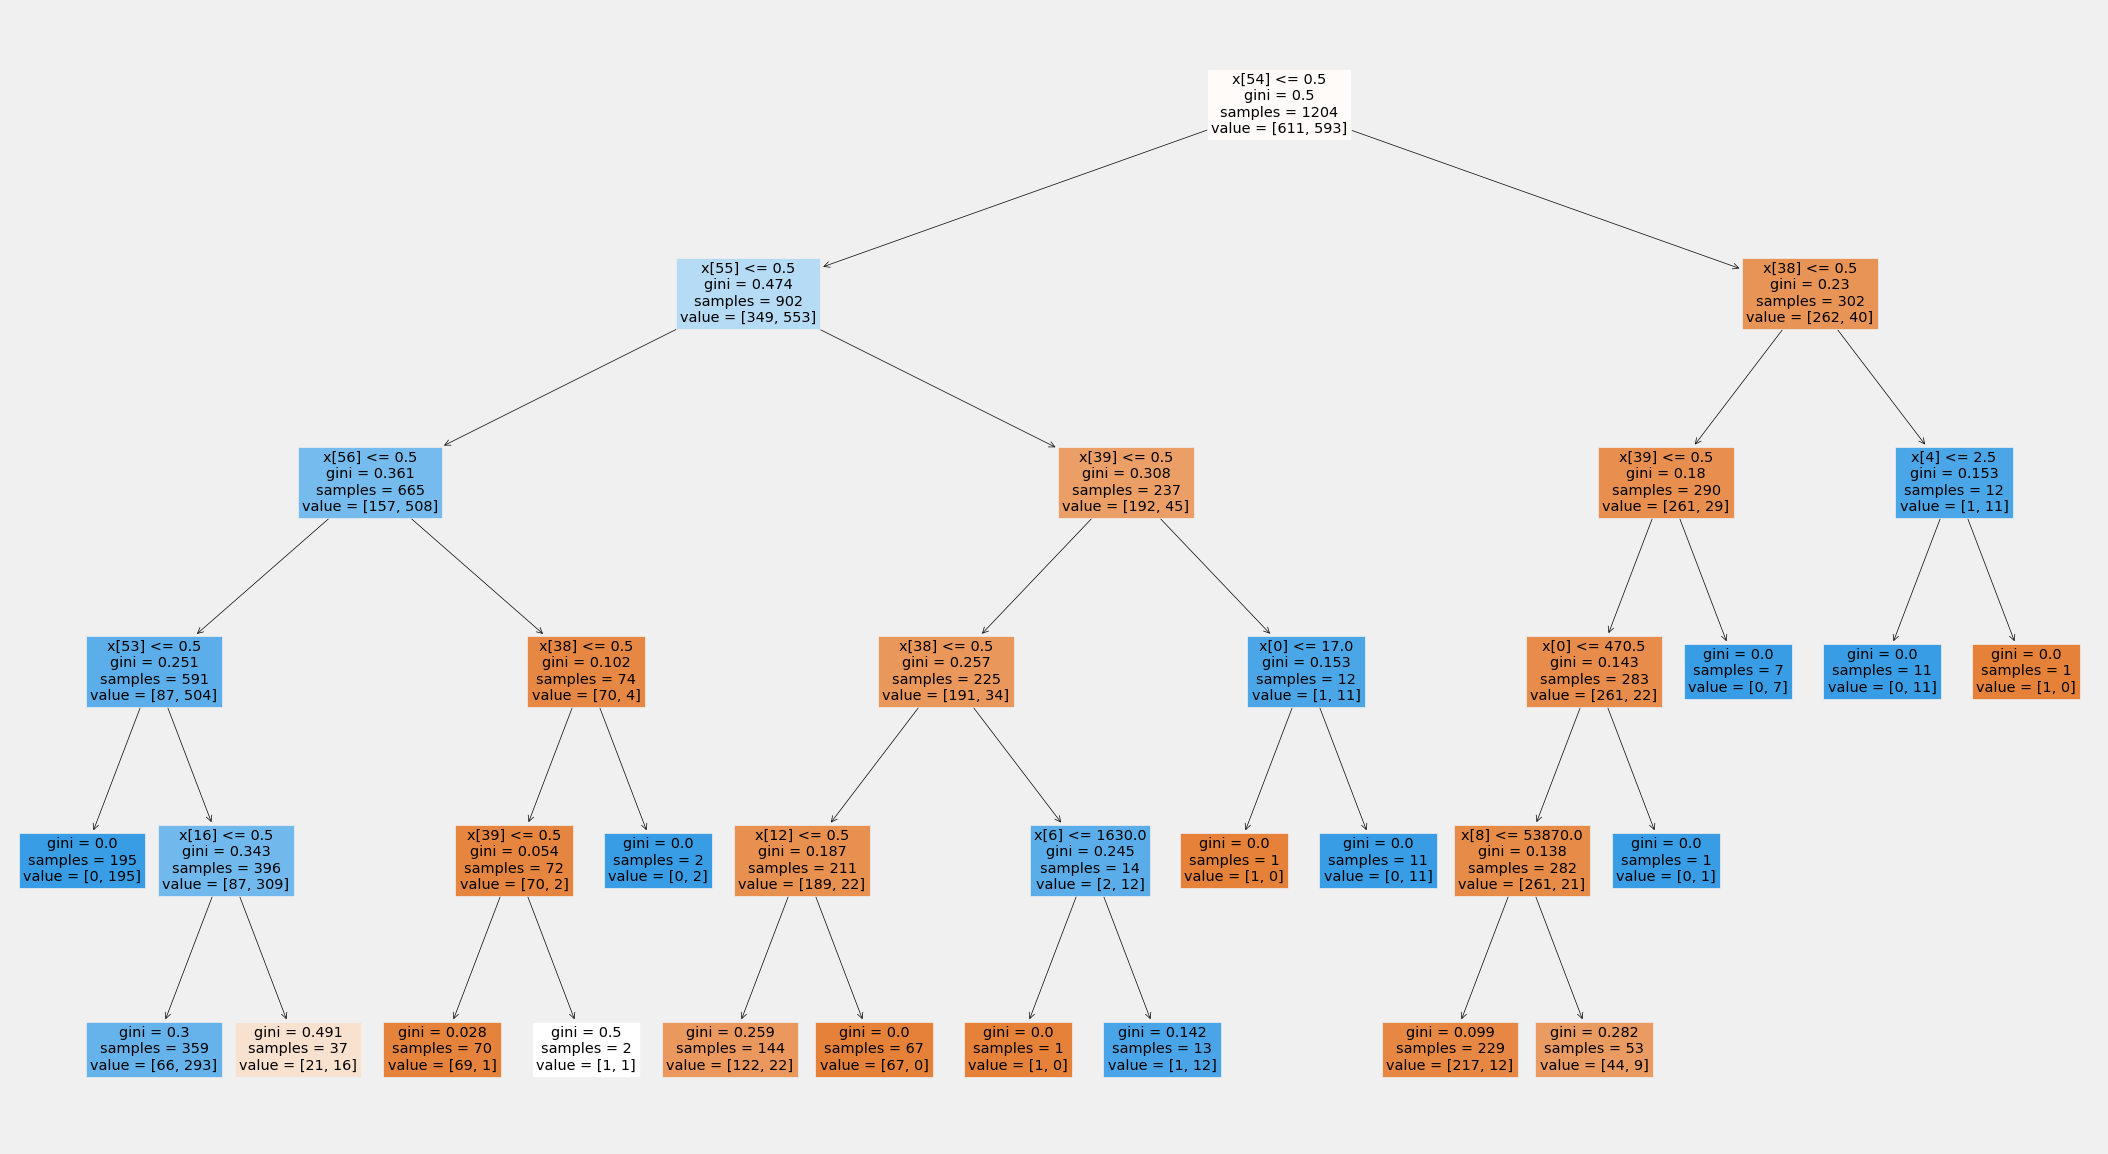

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt, filled=True)

# 3)  USing Random Forest 

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.2, random_state=42)


In [161]:

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(x_train, y_train)

y_pred=rfc.predict(x_test) 
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [162]:
from sklearn.metrics import accuracy_score,classification_report,f1_score 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8344370860927153

In [163]:
Precision = precision_score(y_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.8928571428571429

In [164]:
F1_Score = f1_score(y_test,y_pred)# when precision and recall both are important ,average of recall and precision.
F1_Score

0.8333333333333334

In [165]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
confusion_matrix(y_test, y_pred)

array([[127,  15],
       [ 35, 125]], dtype=int64)

In [166]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       142
           1       0.89      0.78      0.83       160

    accuracy                           0.83       302
   macro avg       0.84      0.84      0.83       302
weighted avg       0.84      0.83      0.83       302



# Cross validation score

In [167]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
print(classification_report(y_test, y_pred))


scores = cross_val_score(rfc, x, y, cv=10, scoring='accuracy')
rfc_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rfc_accuracy)

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       142
           1       0.89      0.78      0.83       160

    accuracy                           0.83       302
   macro avg       0.84      0.84      0.83       302
weighted avg       0.84      0.83      0.83       302

Cross-Validated Accuracy: 0.80


# Hyperparameter tunning for RFC

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [169]:
#craeting parameter list to pass in Grid Search CV
Parameter={'n_estimators':np.arange(50,200,10),
          'criterion':['gini','entropy'],
          'max_depth':np.arange(2,8)}


In [170]:
GCV = GridSearchCV (RandomForestClassifier(), Parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [171]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 70}

In [172]:
#evaluation of best paramters on model
model=RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators= 80)

In [173]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=80)

In [174]:
prediction=model.predict(x_test)
prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [175]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report, roc_curve, roc_auc_score
print("Accuracy_score:{:.2f}".format(accuracy_score(y_test,prediction)*100))

Accuracy_score:83.11


[[120  22]
 [ 29 131]]
0.8311258278145696
              precision    recall  f1-score   support

           0       0.81      0.85      0.82       142
           1       0.86      0.82      0.84       160

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302



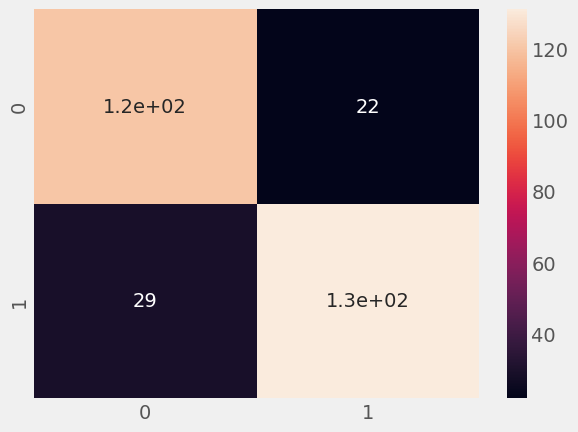

In [176]:
print(confusion_matrix(y_test, prediction))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

Confusion matrix
[[120  22]
 [ 29 131]]


<Figure size 640x480 with 0 Axes>

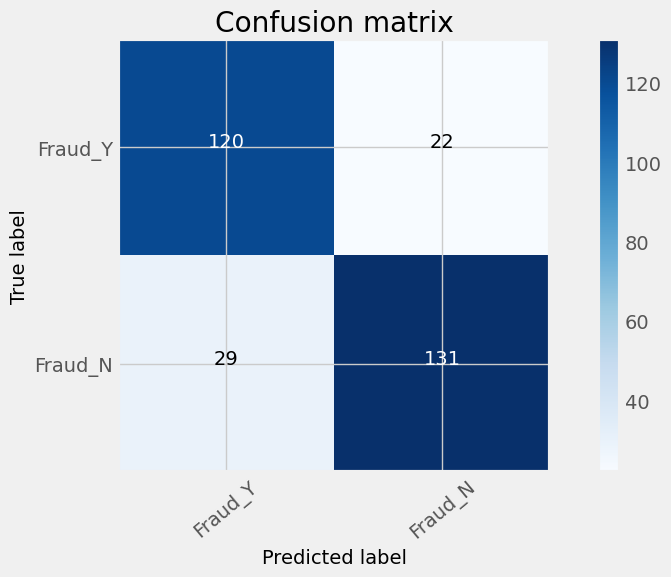

In [177]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction)

np.set_printoptions(precision=2)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

# XGB classifier

In [178]:
!pip install xgboost

In [217]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.3, random_state=42)

# Initialize and train the XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = xgb.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print(classification_report(y_test,y_pred))

Accuracy: 0.8738938053097345
Precision: 0.8808510638297873
Recall: 0.8771186440677966
F1 score: 0.8789808917197452
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       216
           1       0.88      0.88      0.88       236

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452



In [218]:
accuracy_score=accuracy_score(y_test,y_pred)

In [219]:
accuracy_score

0.8738938053097345

In [220]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[188,  28],
       [ 29, 207]], dtype=int64)

# Hyperparameter tunning of XGB classifier

In [183]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming you have your feature matrix X and target variable y
# Define the hyperparameters and their possible values to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}



# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [184]:
# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Print the best accuracy score found
print("Best accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best accuracy score:  0.9032498307379824


In [185]:
#evaluation of best paramters on model
xgb=XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.9)

In [186]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [187]:
y_pred=xgb.predict(x_test)

In [188]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [189]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8783185840707964

[[186  30]
 [ 25 211]]
0.8783185840707964
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       216
           1       0.88      0.89      0.88       236

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



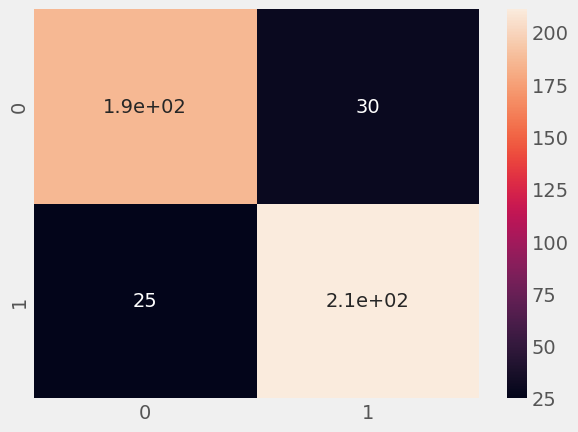

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Confusion matrix
[[186  30]
 [ 25 211]]


<Figure size 640x480 with 0 Axes>

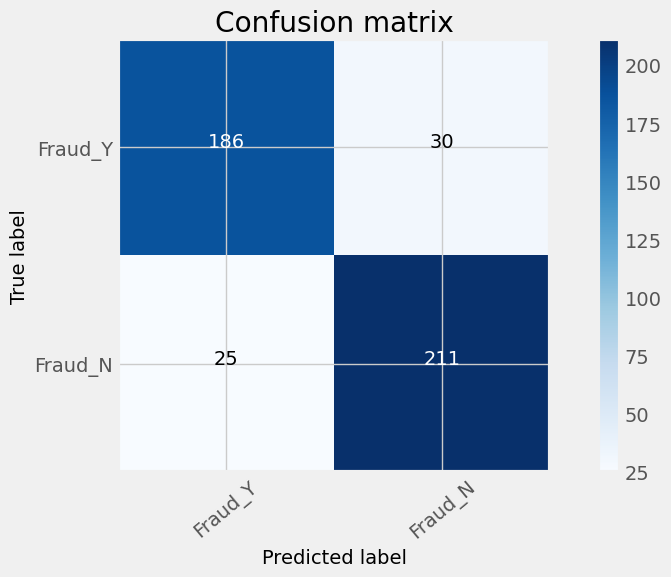

In [192]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

In [193]:
# Assuming 'best_model' is your fitted tree-based model

# Get feature importances
importances =xgb.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importance table
print(feature_importance_df)


                                  Feature  Importance
55              Severity_level_Total Loss    0.086019
53            Severity_level_Major Damage    0.085591
54            Severity_level_Minor Damage    0.085051
56          Severity_level_Trivial Damage    0.072787
11   Policy_combined_single_limit_250/500    0.039673
..                                    ...         ...
82                   Vehicle_Model_Accord    0.000000
83                     Vehicle_Model_C300    0.000000
84                      Vehicle_Model_CRV    0.000000
85                    Vehicle_Model_Camry    0.000000
114                      Vehicle_Model_X6    0.000000

[115 rows x 2 columns]


In [194]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'feature':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(xgb, x_train); fi[:15]

,feature,imp
55,Severity_level_Total Loss,0.086019
53,Severity_level_Major Damage,0.085591
54,Severity_level_Minor Damage,0.085051
56,Severity_level_Trivial Damage,0.072787
11,Policy_combined_single_limit_250/500,0.039673
12,Policy_combined_single_limit_500/1000,0.031791
16,Insured_kinship_own-child,0.026057
57,Contacted_Authorities_Ambulance,0.021431
38,Insured-Hobbies_chess,0.021029
58,Contacted_Authorities_Fire,0.019403


In [195]:
#As XGBOOST has the best results with an AUC of 0.82, using this model for scoring
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target = test_target.replace({1:'Y', 0:'N'})

predicted_target = xgb.predict(x_test)
predicted_target = pd.Series(predicted_target).replace({1:'Y', 0:'N'})

In [196]:
xgb_pred_prob=xgb.predict_proba(x_test)[:,-1]
ranks=pd.DataFrame(data=
                   { 
                       'RealClass':test_target, 
                       'PredictedClass':predicted_target,
                       'rank':xgb_pred_prob
                   })
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,RealClass,PredictedClass,rank
197,Y,Y,0.983709
284,Y,Y,0.982621
260,Y,Y,0.980649
346,Y,Y,0.980570
110,Y,Y,0.978967


In [197]:
test_target.head(30)

0     N
1     Y
2     Y
3     N
4     N
5     Y
6     N
7     Y
8     Y
9     Y
10    Y
11    Y
12    N
13    Y
14    N
15    Y
16    N
17    N
18    N
19    N
20    N
21    Y
22    N
23    N
24    Y
25    Y
26    Y
27    Y
28    Y
29    Y
Name: Fraud_Reported, dtype: object

In [198]:
predicted_target.head(30)

0     N
1     Y
2     N
3     N
4     N
5     Y
6     N
7     Y
8     Y
9     Y
10    Y
11    Y
12    N
13    Y
14    N
15    Y
16    N
17    N
18    N
19    Y
20    N
21    Y
22    N
23    N
24    Y
25    Y
26    Y
27    Y
28    Y
29    Y
dtype: object

In [199]:
top = ranks.where(ranks['rank']>0.5,).dropna()
ranks.tail(50)

,RealClass,PredictedClass,rank
17,N,N,0.067695
172,N,N,0.066952
228,Y,N,0.066788
305,N,N,0.066783
187,N,N,0.066062
105,N,N,0.065260
129,N,N,0.065081
69,N,N,0.064996
235,N,N,0.064052
20,N,N,0.063714
